In [57]:
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

import matplotlib.axes as axes
import matplotlib.pyplot as plt
# from google.colab import files

import pandas as pd
import glob
import os

import scipy

# Paschen Curve

## Expected Curve


$$
V_\text{breakdown} = \frac{B p d}{\ln(A pd) - \ln(\ln(1+\frac{1}{\gamma}))}
$$

For our experiment, we will use the following constants:

$$
A = 12 \, {\text{cm}^{-1} \text{Torr}^{-1}}, \; B = 180 \,{V \text{cm}^{-1} \text{Torr}^{-1}},  \; d = 5.664 \, \text{cm}, \; \gamma = 0.02
$$

In [3]:
# Experimental constants
A = 12
B = 180
d = 2.35
# d = 5.5
gamma = 0.02

ps = np.linspace(140e-3, 2000e-3, 500)

Vs = B * ps * d / (np.log(A*ps*d) - np.log(np.log(1 + 1/gamma)))

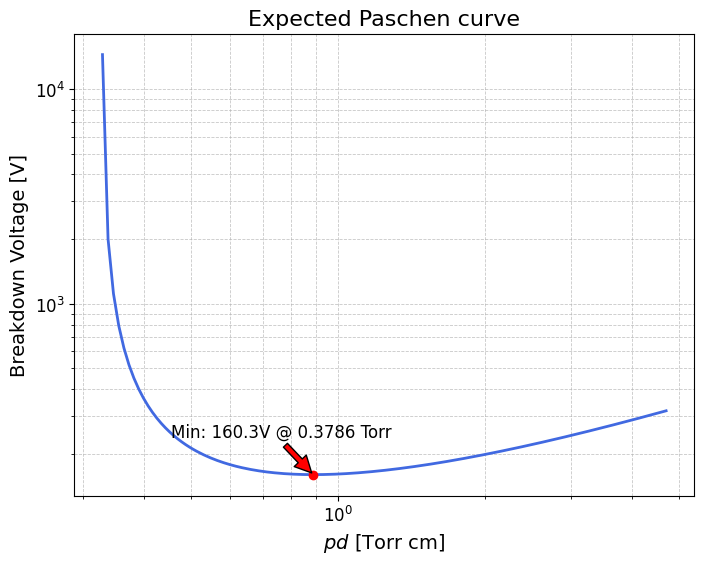

In [4]:
plt.figure(figsize=(8,6))
plt.plot(ps*d, Vs, color="royalblue", linewidth=2, linestyle="-", label="Paschen's Law")

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$pd$ [Torr cm]", fontsize=14)
plt.ylabel("Breakdown Voltage [V]", fontsize=14)
plt.title("Expected Paschen curve", fontsize=16)


plt.grid(True, which="both", linestyle="--", linewidth=0.6, alpha=0.7)
plt.minorticks_on()
plt.tick_params(axis="both", which="major", labelsize=12)

# Annotate Minimum Point (Optional)
min_idx = np.argmin(Vs)
plt.scatter(ps[min_idx]*d, Vs[min_idx], color="red", zorder=3)
plt.annotate(f"Min: {Vs[min_idx]:.1f}V @ {ps[min_idx]:.4f} Torr",
             xy=(ps[min_idx]*d, Vs[min_idx]),
             xytext=(ps[min_idx]*1.2, Vs[min_idx]*1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12)

# plt.legend(fontsize=12, loc="best")

# Show
plt.show()

## Importing data

In [32]:
# Be sure to include ../ so we go up into the right directory

directory = "../athalia and jorge's data/paschen2.0"

# Find all "mtorr_neg.txt" files
neg_files = glob.glob(os.path.join(directory, "*mtorr_neg.txt"))

# print(neg_files)
# Load each file into a DataFrame and store in a dictionary
dataframes_neg = {}
for file in neg_files:
    # print(file)
    df = pd.read_csv(file, delimiter="\t", header=None, names=["Current", "Voltage", "Time"])
    dataframes_neg[os.path.basename(file)] = df

# Preview the datasets (uncomment if needed)
# for filename, df in dataframes.items():
#     print(f"Preview of {filename}:")
#     print(df.head())

# Be sure to include ../ so we go up into the right directory

directory = "../athalia and jorge's data/paschen2.0"

# Find all "mtorr_neg.txt" files
pos_files = glob.glob(os.path.join(directory, "*mtorr_pos.txt"))

# print(neg_files)
# Load each file into a DataFrame and store in a dictionary
dataframes_pos = {}
for file in pos_files:
    # print(file)
    df = pd.read_csv(file, delimiter="\t", header=None, names=["Current", "Voltage", "Time"])
    dataframes_pos[os.path.basename(file)] = df

# Preview the datasets (uncomment if needed)
# for filename, df in dataframes.items():
#     print(f"Preview of {filename}:")
#     print(df.head())


### Plots


We first inspect one data point

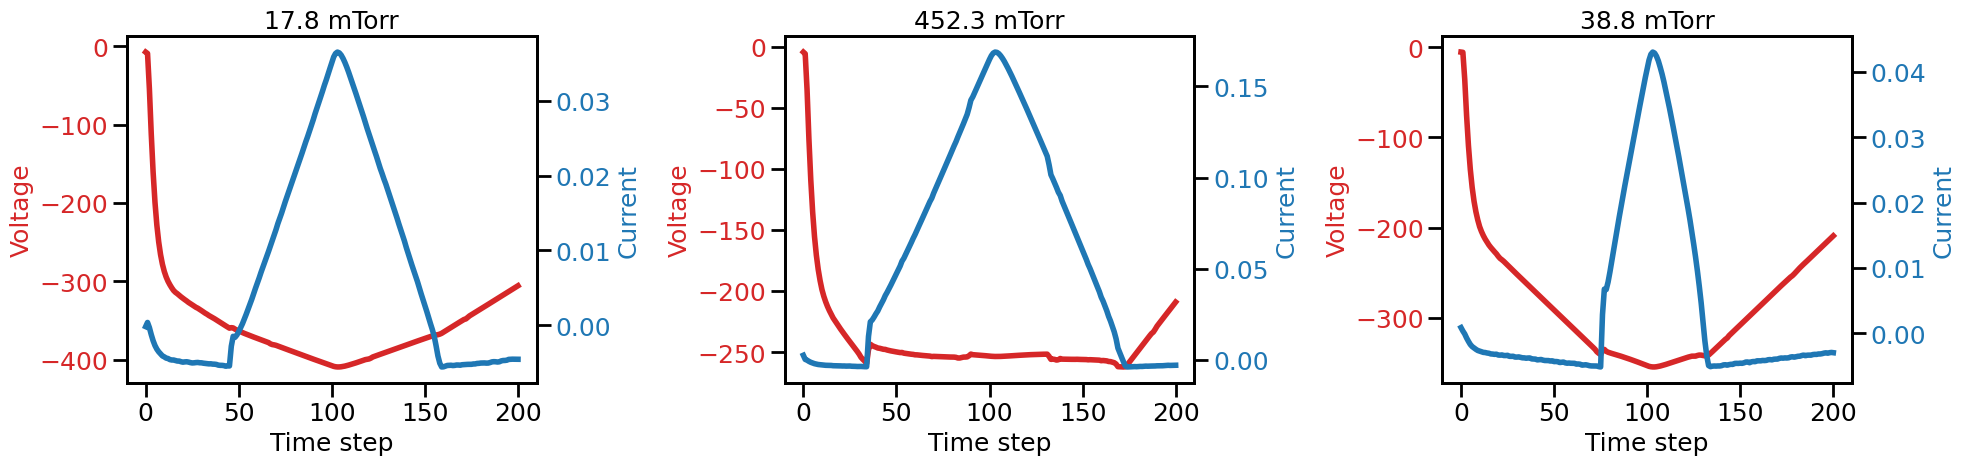

In [ ]:
import random

# Select three random keys from your neg data dictionary
selected_keys = random.sample(list(dataframes_neg.keys()), 3)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust figsize as needed


for ax, key in zip(axes, selected_keys):
    df = dataframes_neg[key]
    
    # Create a second y-axis sharing the same x-axis
    ax2 = ax.twinx()
    
    # Plot Voltage on the first axis
    ax.plot(df.index, df['Voltage'], color='tab:red', label='Voltage')
    ax.set_ylabel('Voltage', color='tab:red')
    ax.tick_params(axis='y', labelcolor='tab:red')
    
    # Plot Current on the second axis
    ax2.plot(df.index, df['Current'], color='tab:blue', label='Current')
    ax2.set_ylabel('Current', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    # Label the x-axis and set a title
    ax.set_xlabel('Time step')
    ax.set_title(key.replace("mtorr_neg.txt", " mTorr"))

plt.tight_layout()
plt.savefig('paschen_data_collection.png', dpi=300)
plt.show()


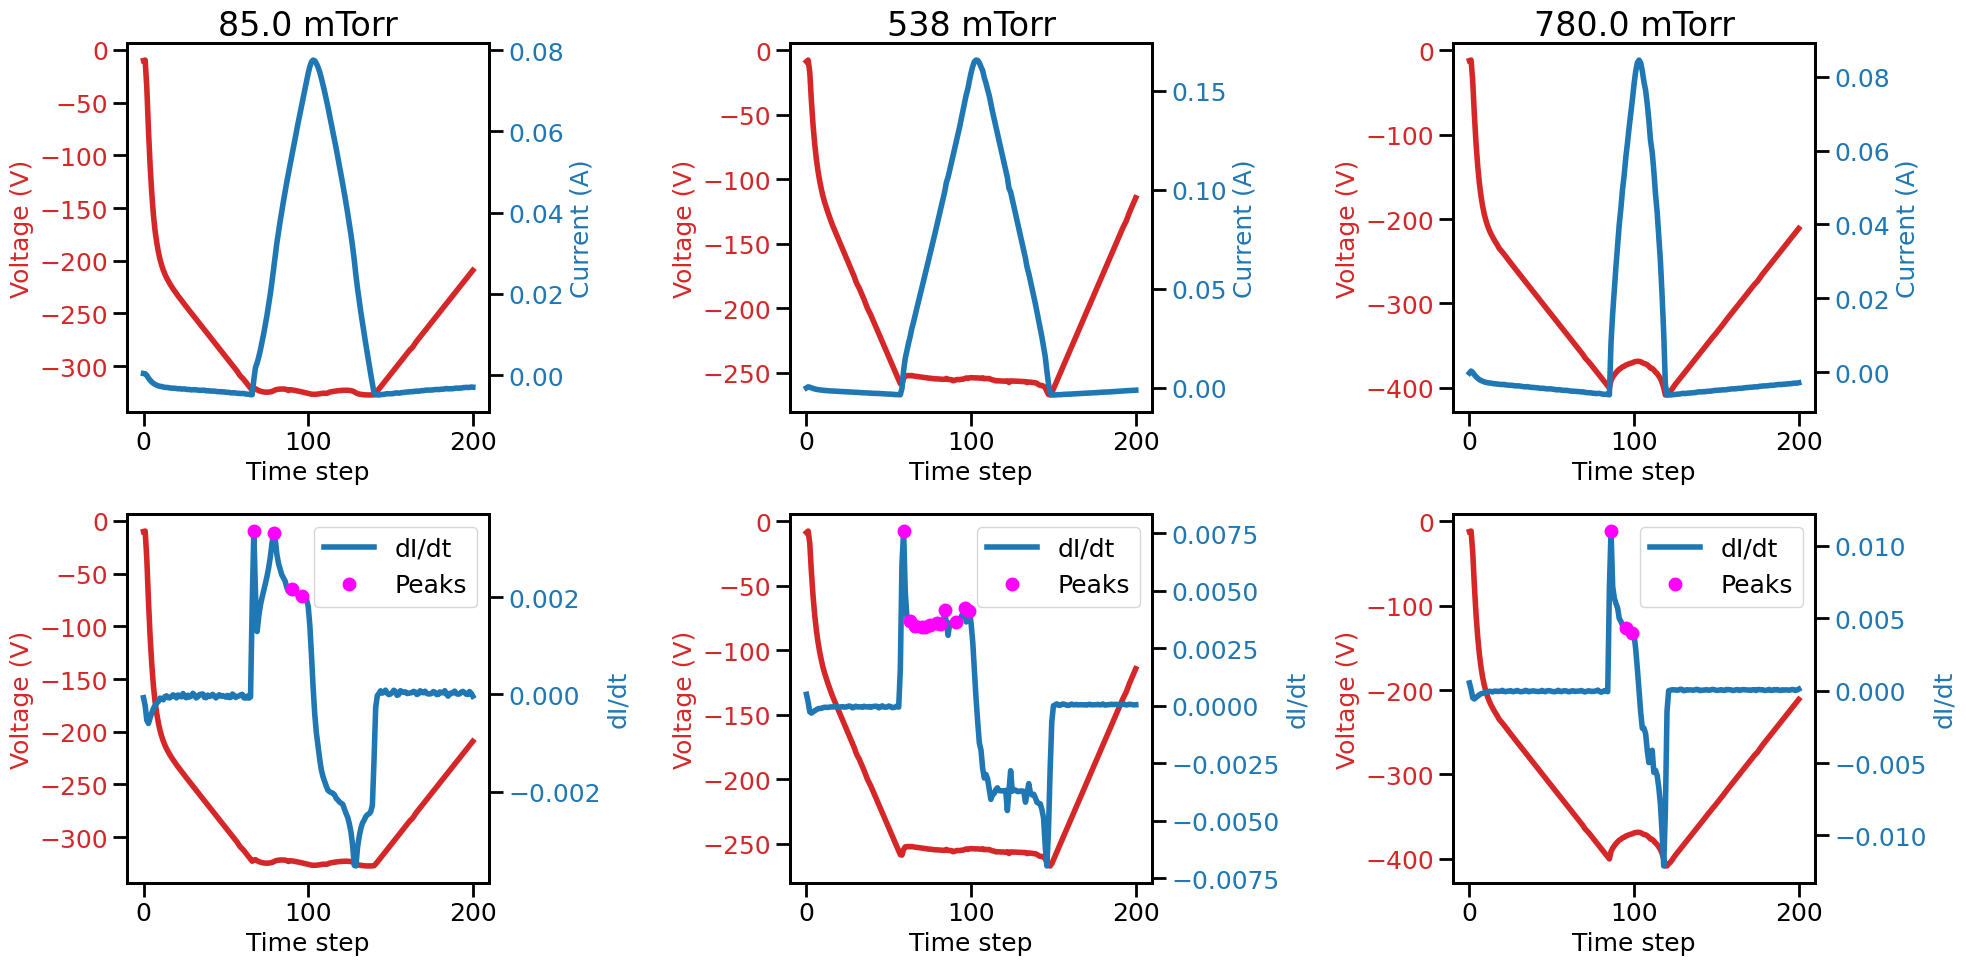

In [107]:
from scipy.signal import find_peaks

# Select three random keys from your neg data dictionary
selected_keys = random.sample(list(dataframes_neg.keys()), 3)

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Adjust figsize as needed

for i, key in enumerate(selected_keys):
    df = dataframes_neg[key]
    
    # Top plot: Voltage and Current (with units)
    ax_top = axes[0, i]
    ax_top_twin = ax_top.twinx()
    ax_top.plot(df.index, df['Voltage'], color='tab:red', label='Voltage')
    ax_top.set_ylabel('Voltage (V)', color='tab:red')
    ax_top.tick_params(axis='y', labelcolor='tab:red')
    ax_top_twin.plot(df.index, df['Current'], color='tab:blue', label='Current')
    ax_top_twin.set_ylabel('Current (A)', color='tab:blue')
    ax_top_twin.tick_params(axis='y', labelcolor='tab:blue')
    ax_top.set_xlabel('Time step')
    ax_top.set_title(key.replace("mtorr_neg.txt", " mTorr"), fontsize=24)
    
    # Bottom plot: Compute derivative and swap y axes order
    derivatives = np.gradient(df["Current"], df.index)
    peaks, properties = find_peaks(derivatives, height=0.001)
    
    ax_bottom = axes[1, i]
    ax_bottom_twin = ax_bottom.twinx()
    
    # Primary axis for Voltage (with units)
    color_voltage = 'tab:red'
    ax_bottom.set_xlabel('Time step')
    ax_bottom.set_ylabel('Voltage (V)', color=color_voltage)
    ax_bottom.plot(df.index, df['Voltage'], color=color_voltage, label='Voltage')
    ax_bottom.tick_params(axis='y', labelcolor=color_voltage)
    
    # Secondary axis for dI/dt (with units)
    color_deriv = 'tab:blue'
    ax_bottom_twin.set_ylabel('dI/dt', color=color_deriv)
    ax_bottom_twin.plot(df.index, derivatives, color=color_deriv, label='dI/dt')
    ax_bottom_twin.tick_params(axis='y', labelcolor=color_deriv)
    ax_bottom_twin.plot(df.index[peaks], derivatives[peaks], "o", color='magenta', label="Peaks")
    ax_bottom_twin.legend(loc="upper right")

plt.tight_layout()
plt.savefig('paschen_data_collection.png', dpi=300)
plt.show()


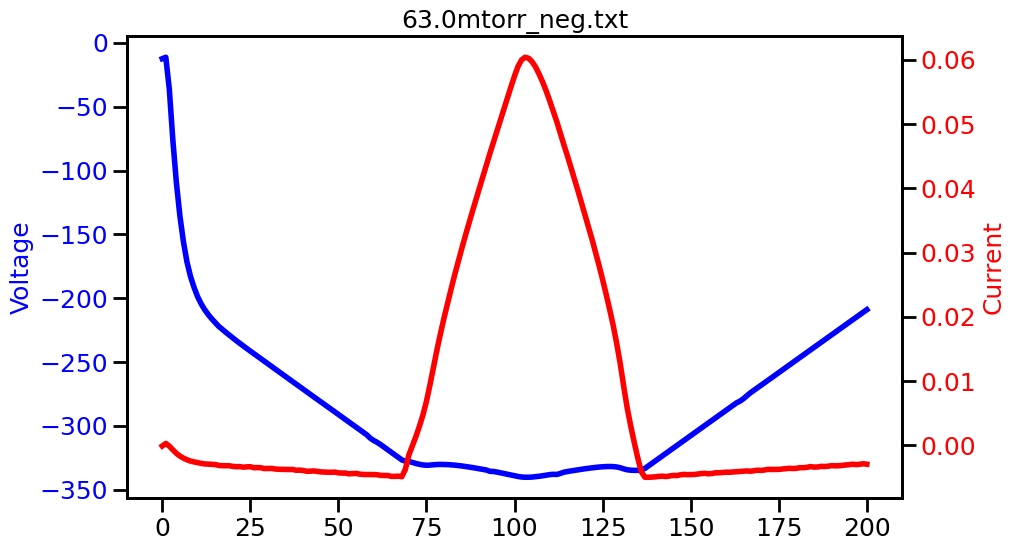

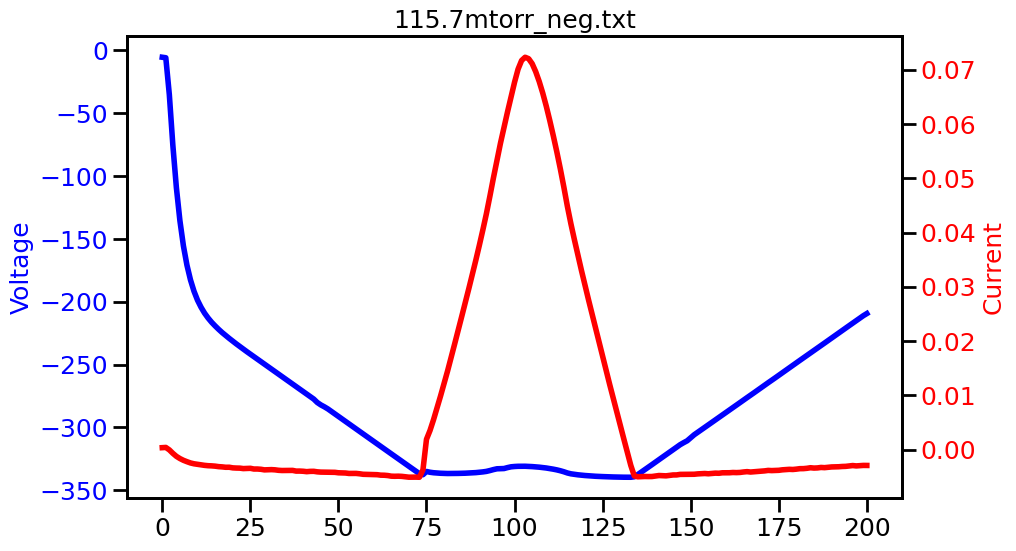

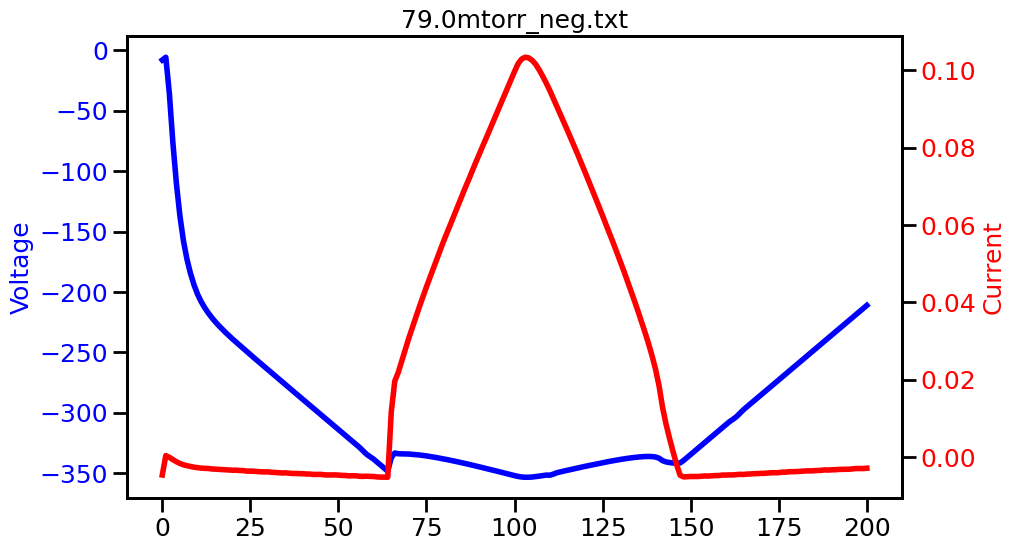

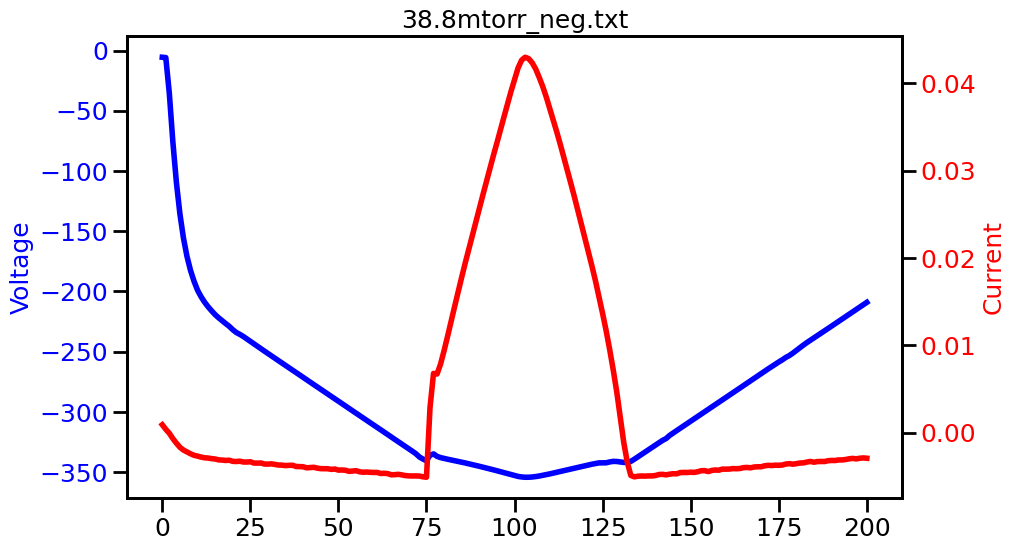

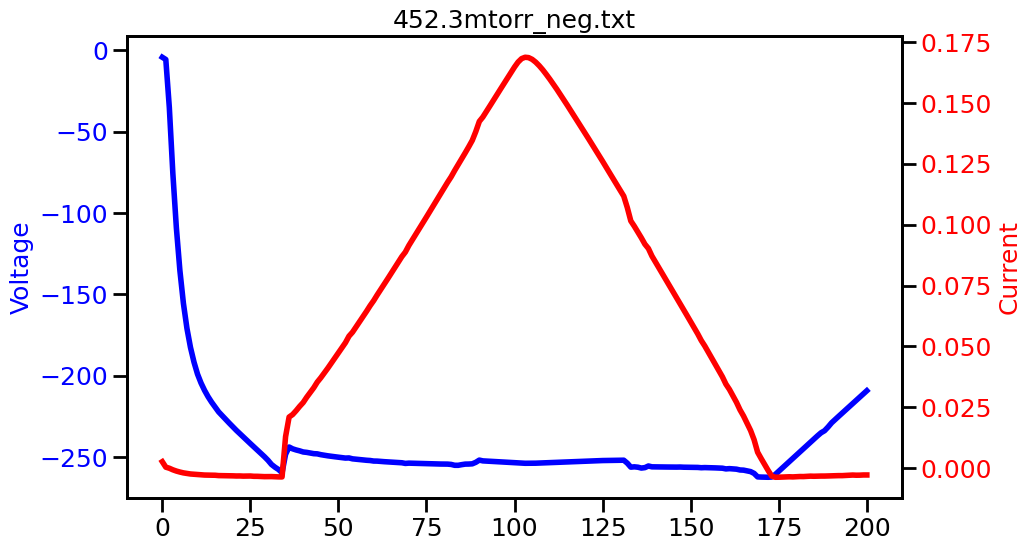

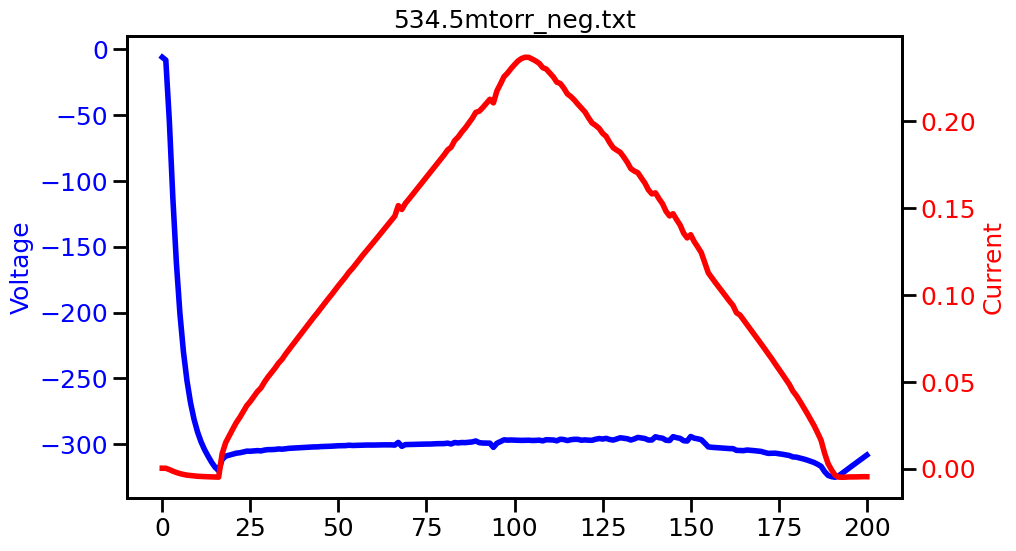

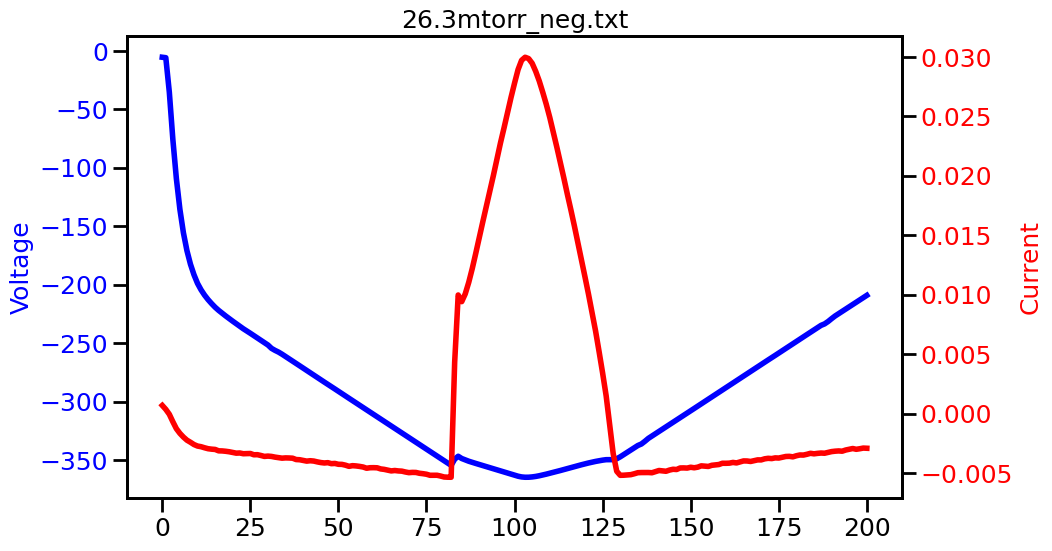

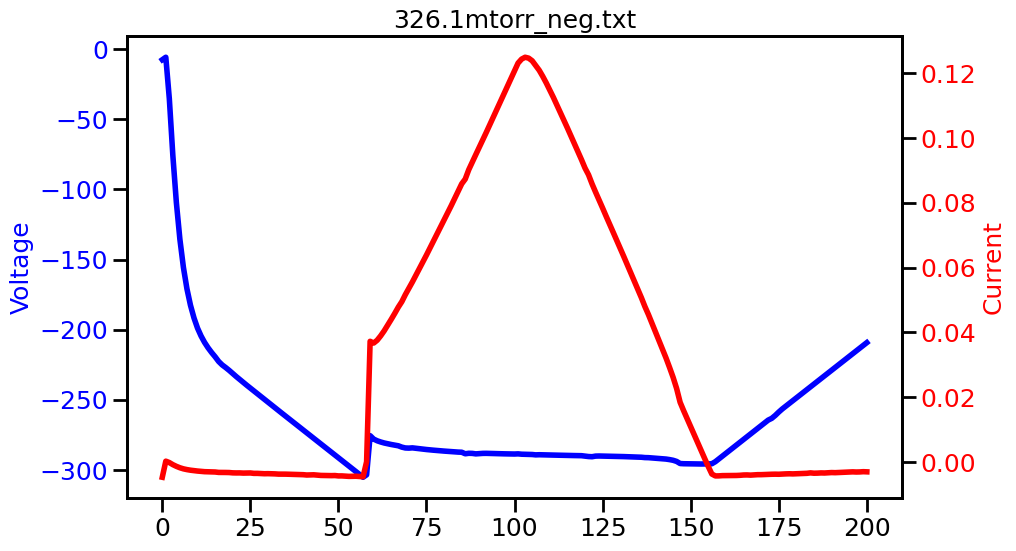

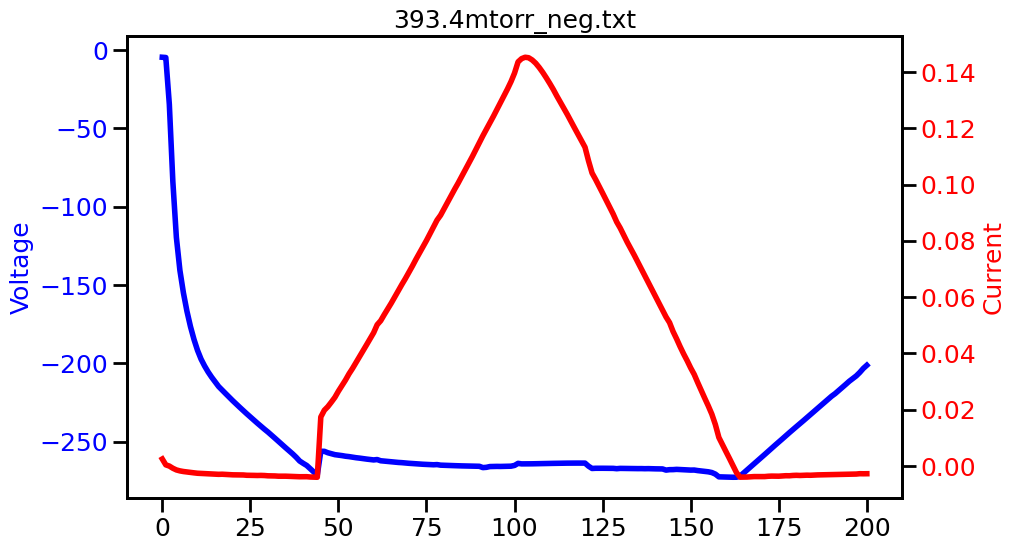

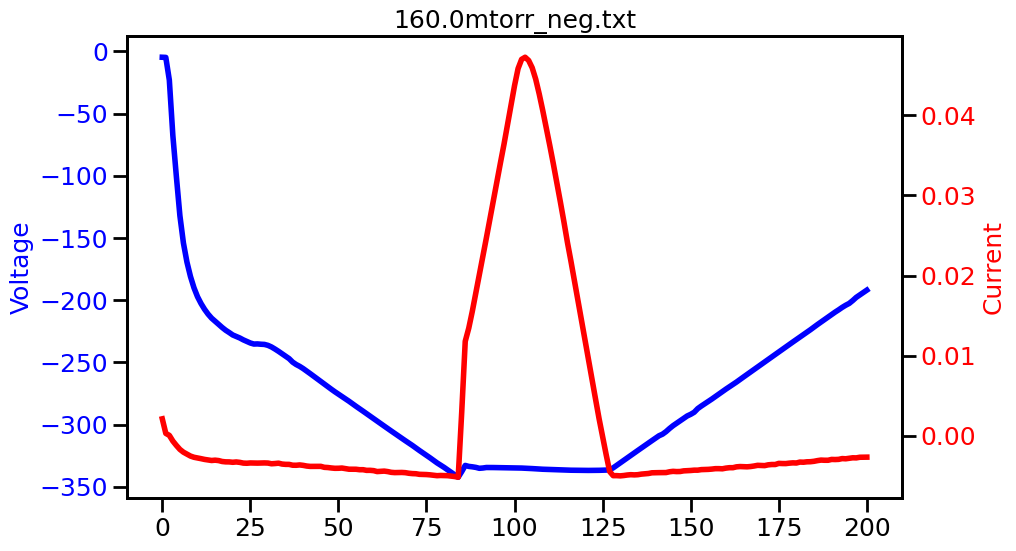

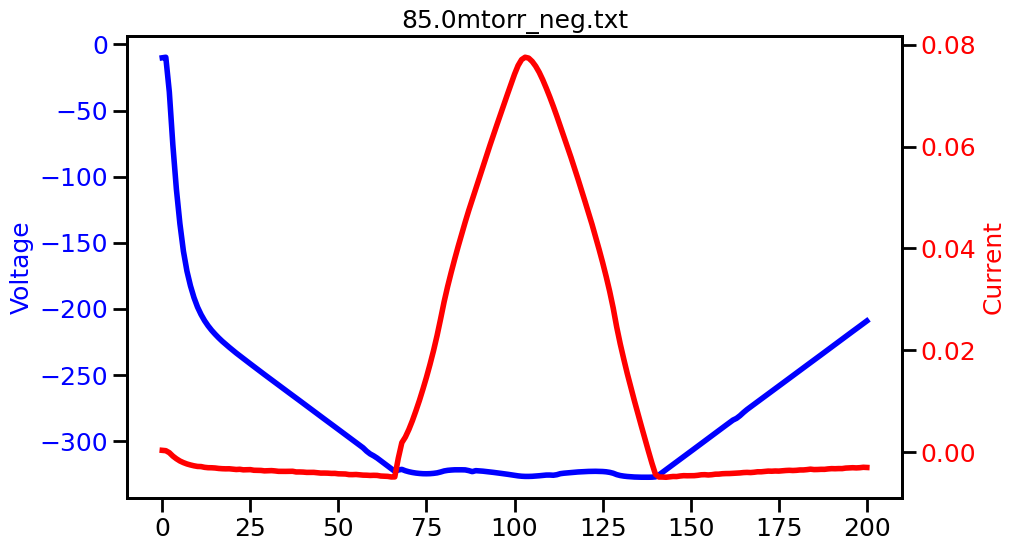

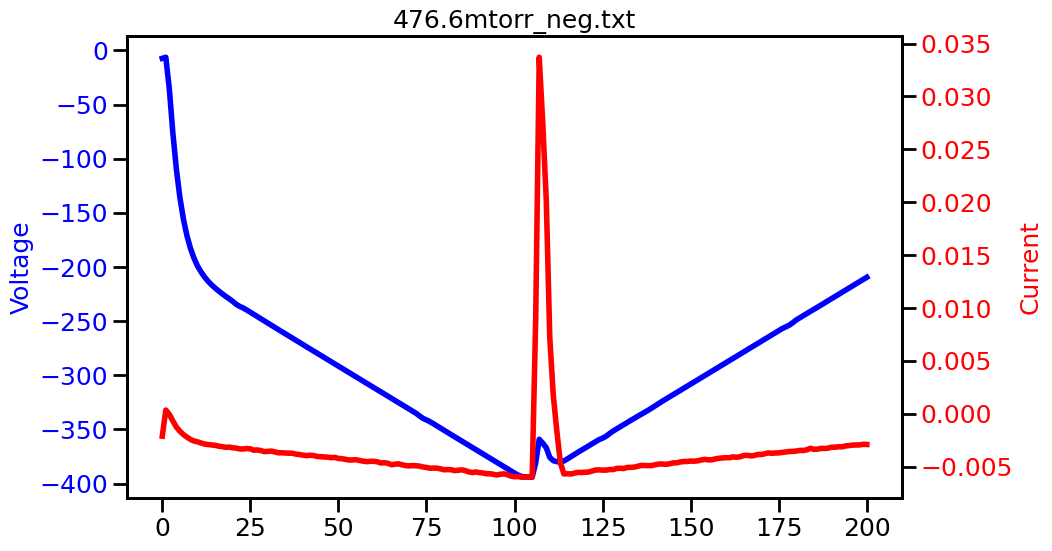

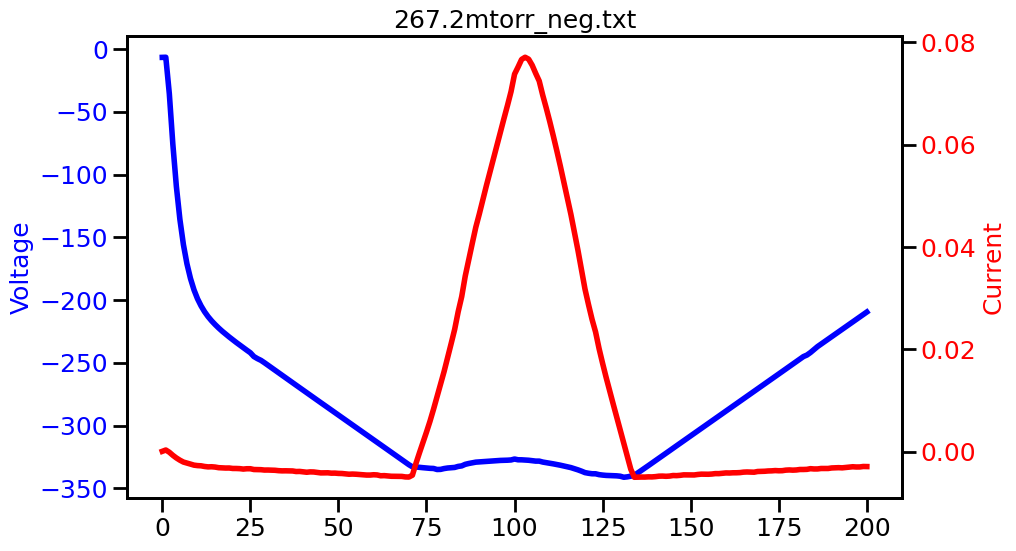

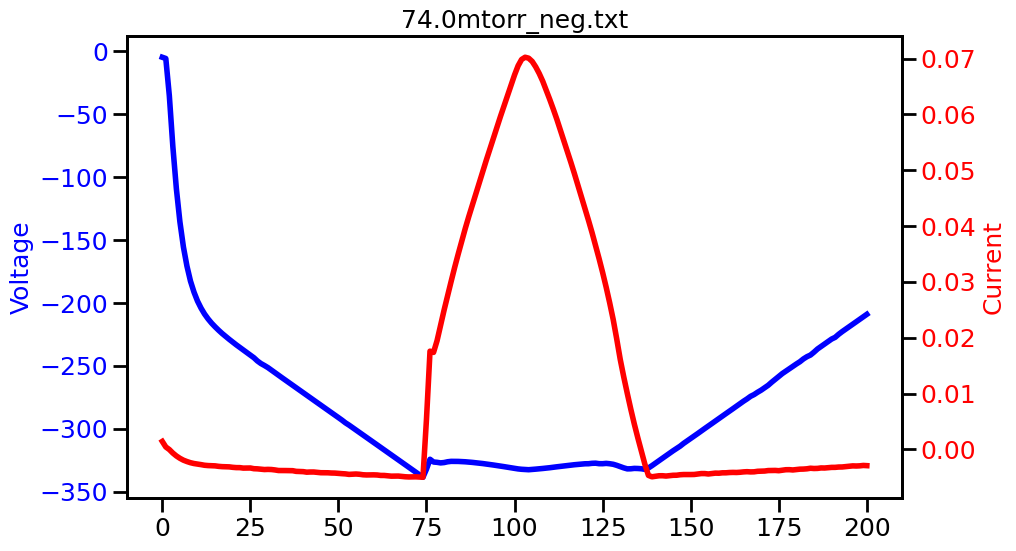

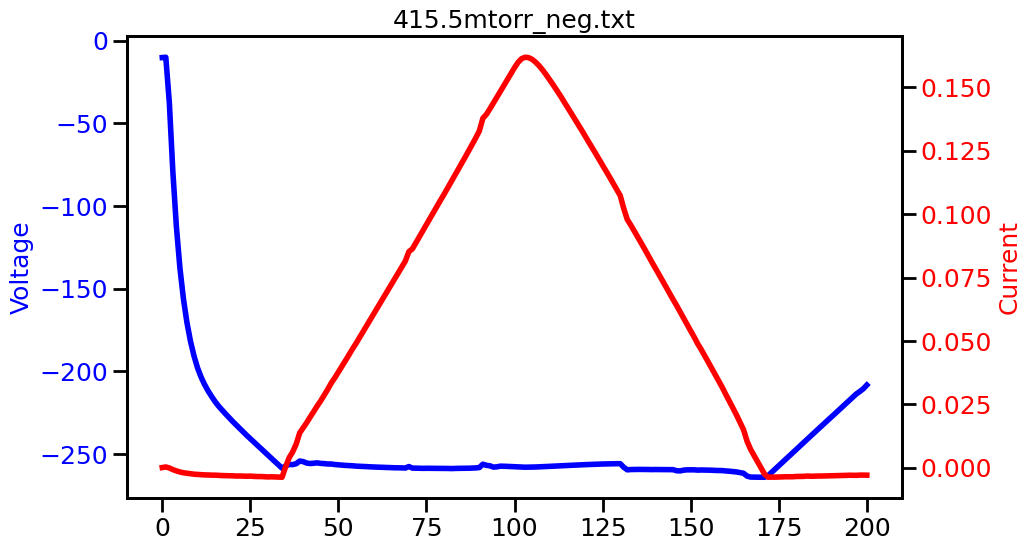

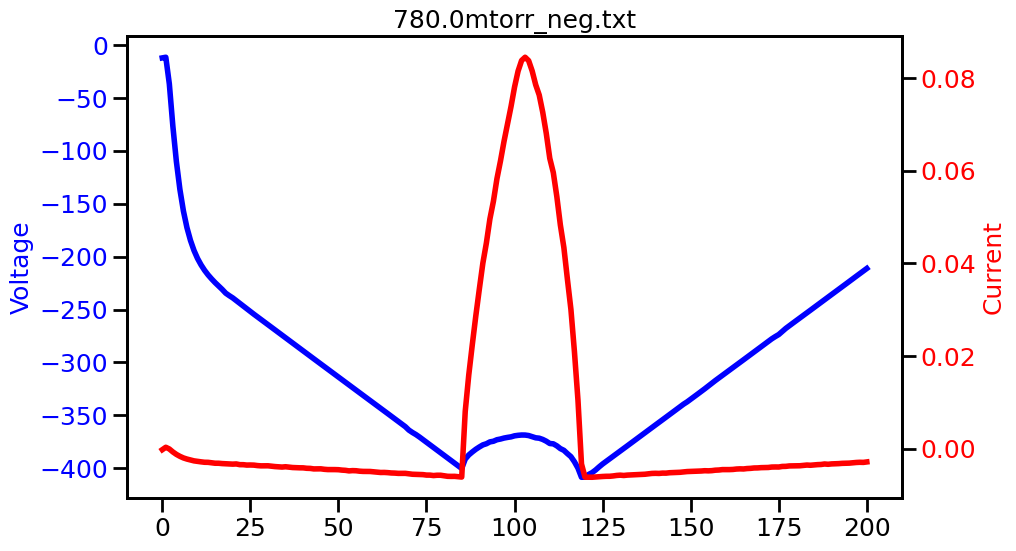

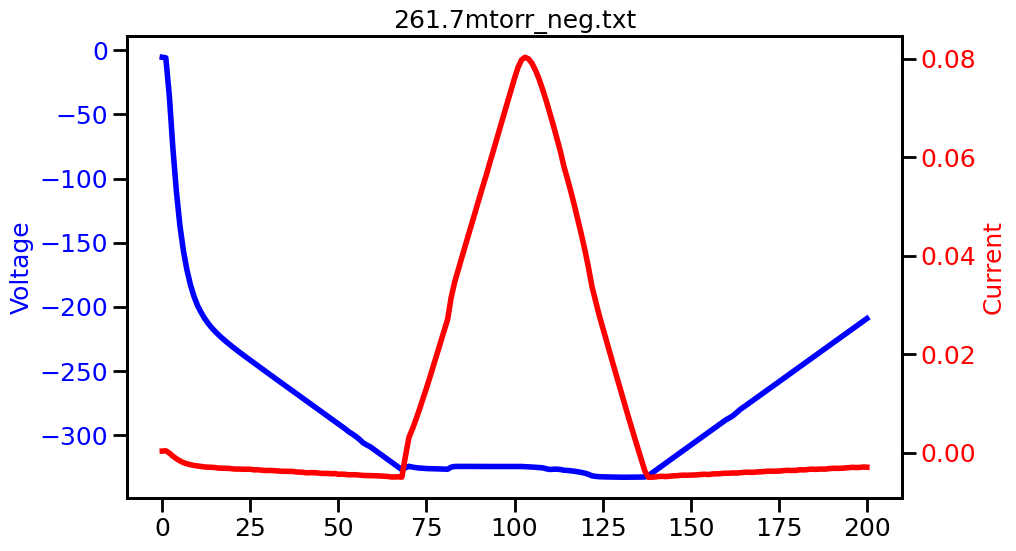

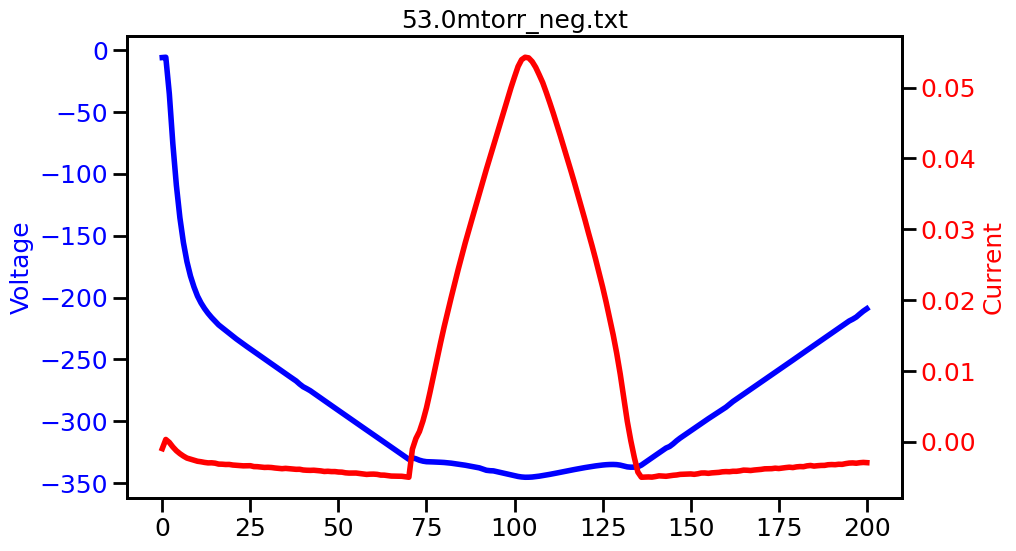

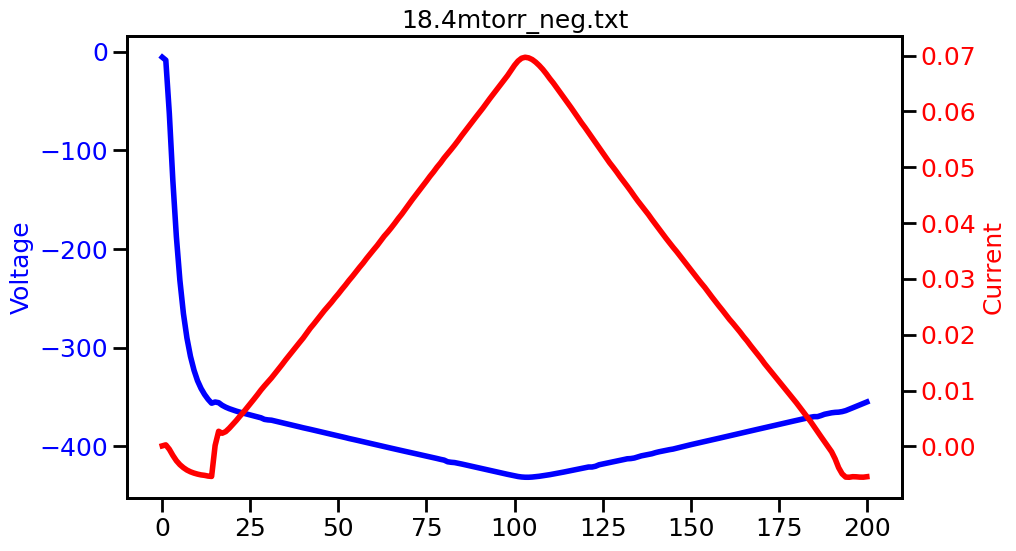

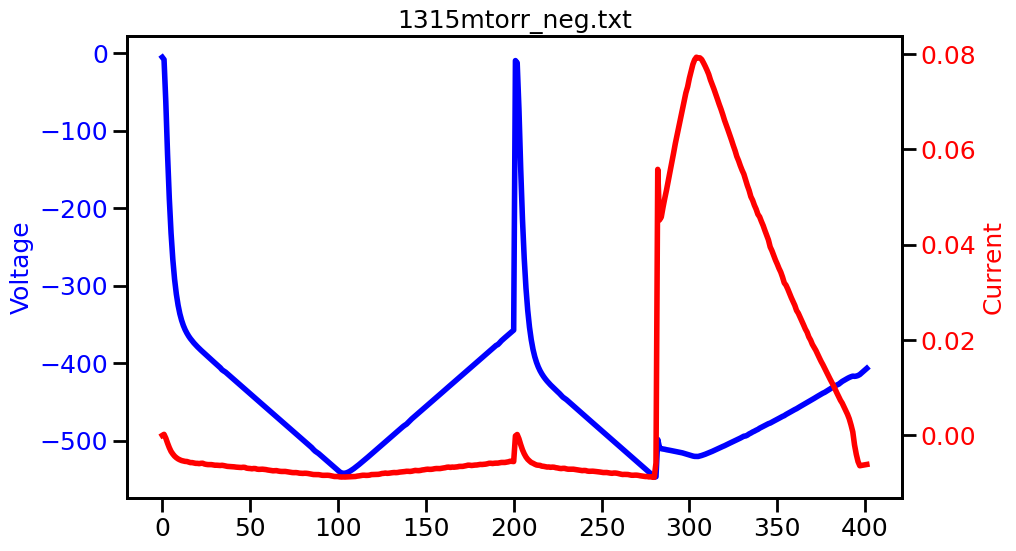

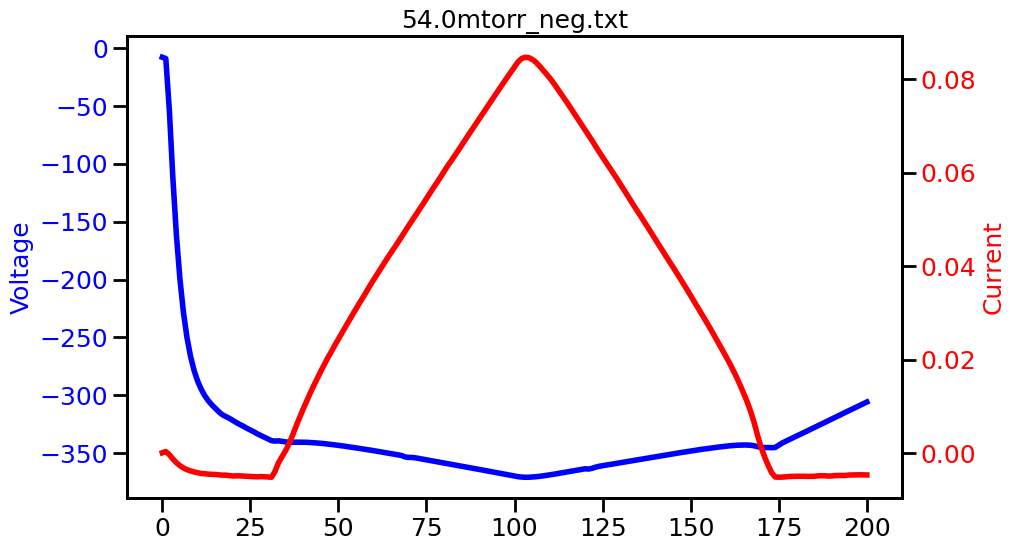

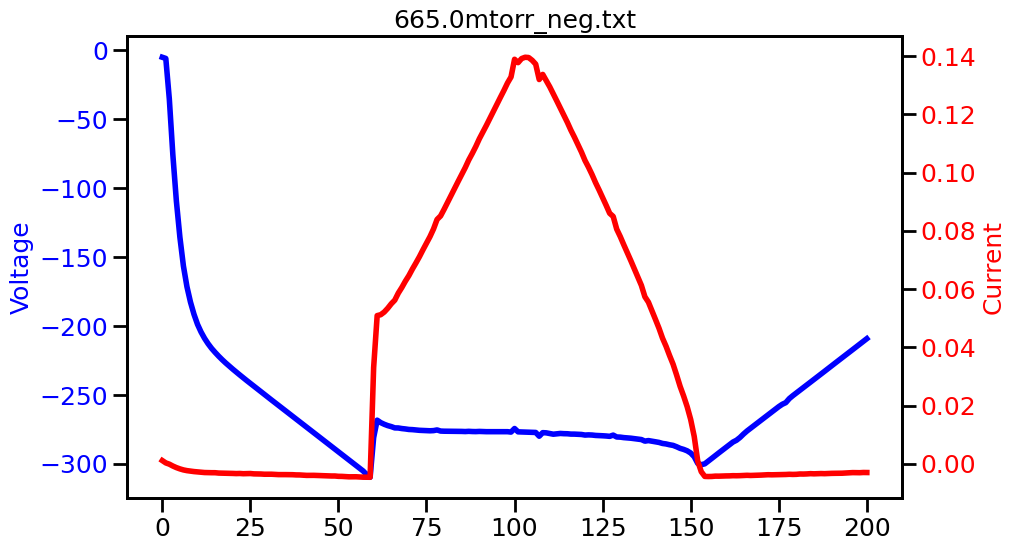

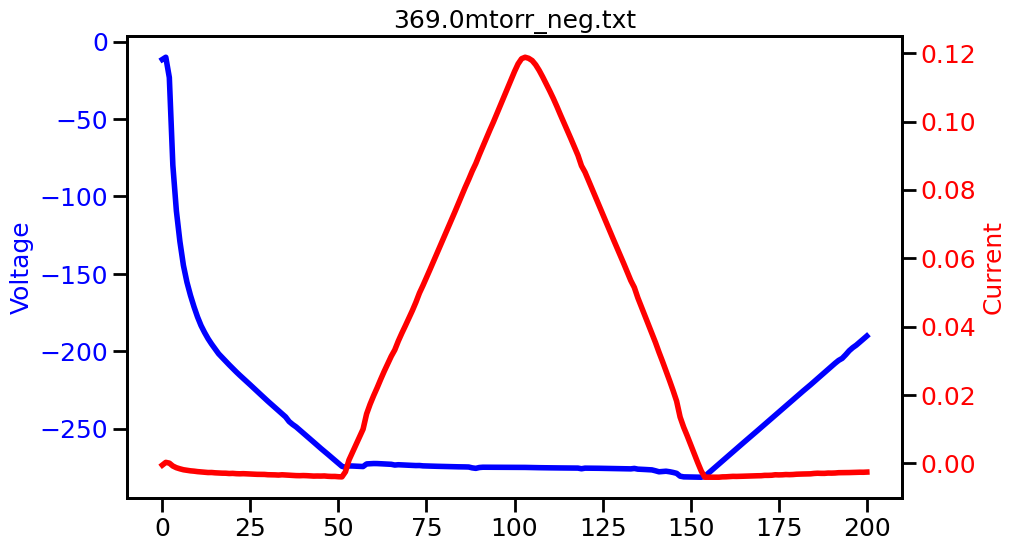

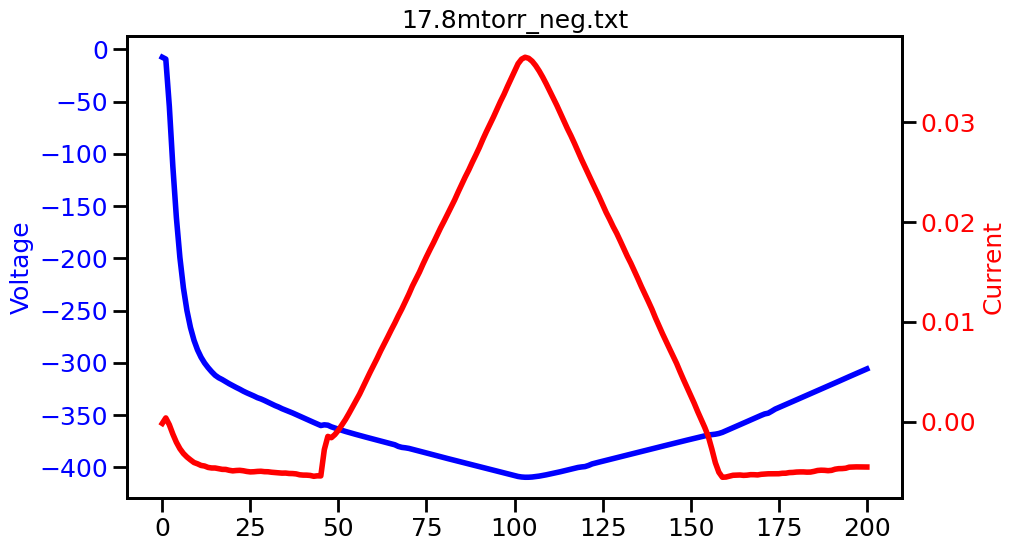

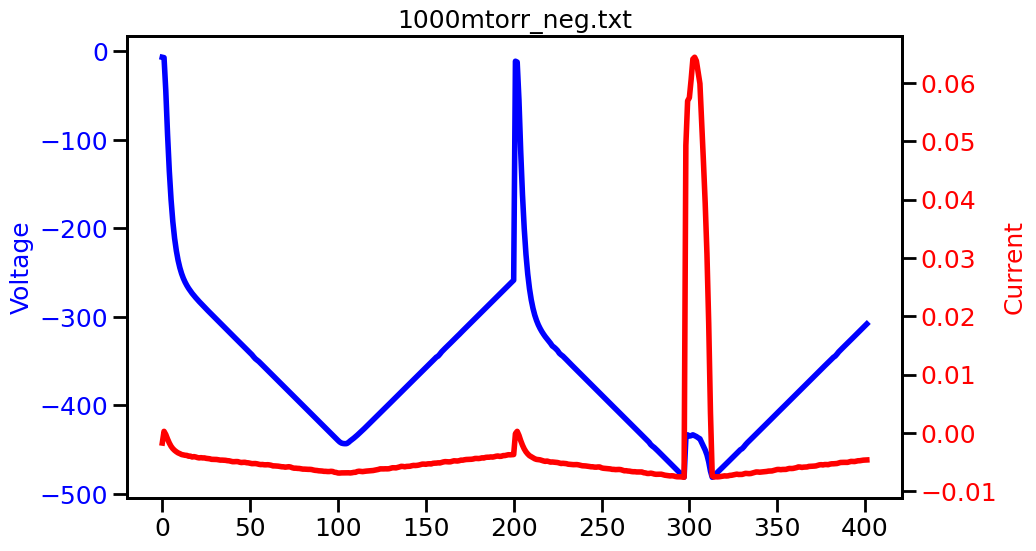

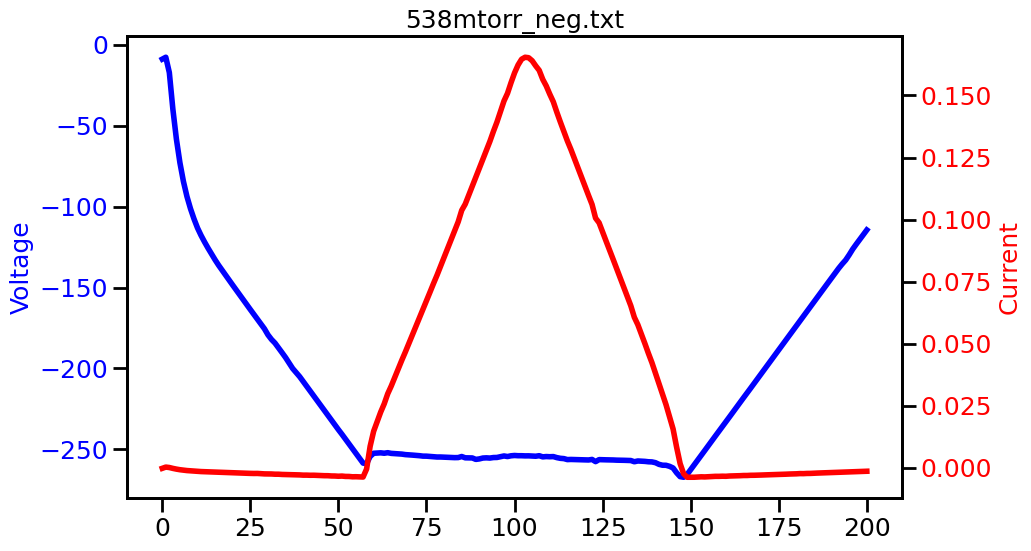

In [76]:

for key, df in dataframes_neg.items():
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()
    
    # Plot Voltage on the first axis
    ax1.plot(df.index, df['Voltage'], color='blue', label='Voltage')
    ax1.set_ylabel('Voltage', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot Current on the second axis
    ax2.plot(df.index, df['Current'], color='red', label='Current')
    ax2.set_ylabel('Current', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.xlabel('Time step')
    plt.title(key)
    plt.show()


  # sample_data.plot(x='Voltage', y='Current', kind='scatter')
  # plt.xlim(-380, -300)
  # plt.show()

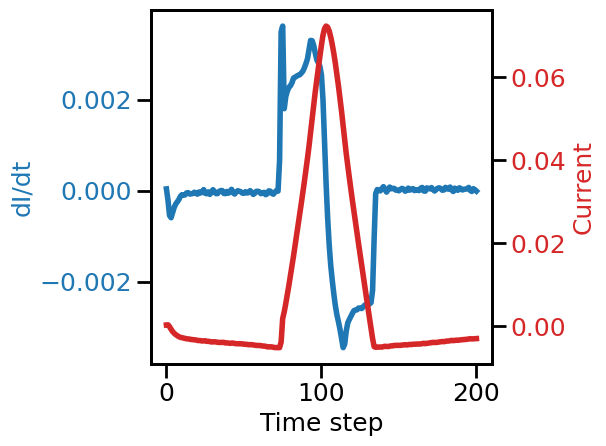

In [87]:

sample_data = dataframes_neg['115.7mtorr_neg.txt']

# Compute the first derivative of "Current" with respect to its index (assumed to be Voltage)
# Note: The correct order is np.gradient(f, x), where f is the function (Current) and x is the independent variable (Voltage).
derivatives = np.gradient(sample_data["Current"], sample_data["Current"].index)

# Create a figure and primary axis for the first derivative
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel('Time step')
ax1.set_ylabel('dI/dt', color=color1)
ax1.plot(sample_data['Current'].index, derivatives, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis for the original Current data
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.set_ylabel('Current', color=color2)
ax2.plot(sample_data['Current'].index, sample_data['Current'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # Adjust layout for clarity
plt.show()


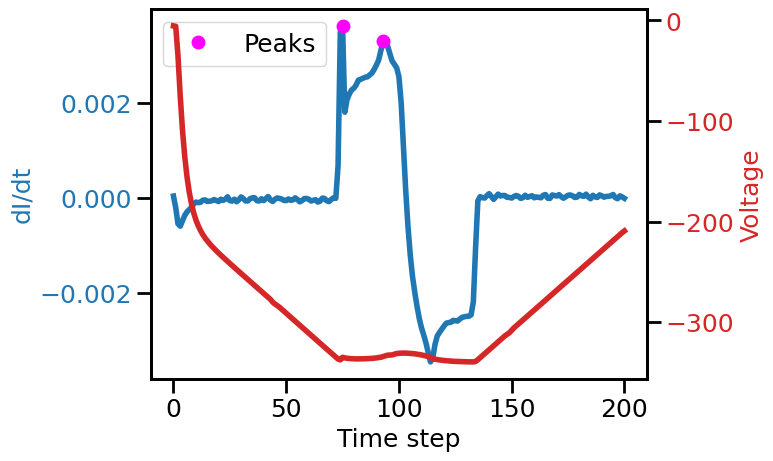

In [90]:
from scipy.signal import find_peaks

sample_data = dataframes_neg['115.7mtorr_neg.txt']

# Compute the first derivative of "Current" with respect to its index (assumed to be Voltage)
# Note: The correct order is np.gradient(f, x), where f is the function (Current) and x is the independent variable (Voltage).
derivatives = np.gradient(sample_data["Current"], sample_data["Current"].index)

# Use find_peaks to locate peaks in the derivative
# You can adjust the 'height' parameter (or others like 'distance', 'prominence') as needed
peaks, properties = find_peaks(derivatives, height=0.001)

# Create a figure and primary axis for the first derivative
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel('Time step')
ax1.set_ylabel('dI/dt', color=color1)
ax1.plot(sample_data['Current'].index, derivatives, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax1.plot(sample_data['Current'].index[peaks], derivatives[peaks], "o", color='magenta', label="Peaks")
ax1.legend(loc="upper left")

# Create a secondary y-axis for the original Current data
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.set_ylabel('Voltage', color=color2)
ax2.plot(sample_data['Voltage'].index, sample_data['Voltage'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# fig.tight_layout()  # Adjust layout for clarity
plt.show()


In [108]:
def get_breakdown_voltage(sample_data, title=None, plotting = True):

    # sample_data = dataframes_neg['115.7mtorr_neg.txt']

    # Compute the first derivative of "Current" with respect to its index (assumed to be Voltage)
    # Note: The correct order is np.gradient(f, x), where f is the function (Current) and x is the independent variable (Voltage).
    derivatives = np.gradient(sample_data["Current"], sample_data["Current"].index)

    # Use find_peaks to locate peaks in the derivative
    # You can adjust the 'height' parameter (or others like 'distance', 'prominence') as needed
    peaks, properties = find_peaks(derivatives, height=0.001)

    if plotting:
        # Create a figure and primary axis for the first derivative
        fig, ax1 = plt.subplots()

        color1 = 'tab:blue'
        ax1.set_xlabel('Time step')
        ax1.set_ylabel('dI/dt', color=color1)
        ax1.plot(sample_data['Current'].index, derivatives, color=color1)
        ax1.tick_params(axis='y', labelcolor=color1)

        ax1.plot(sample_data['Current'].index[peaks], derivatives[peaks], "o", color='magenta', label="Peaks")
        ax1.legend(loc="upper left")

        # Create a secondary y-axis for the original Current data
        ax2 = ax1.twinx()  
        color2 = 'tab:red'
        ax2.set_ylabel('Voltage', color=color2)
        ax2.plot(sample_data['Voltage'].index, sample_data['Voltage'], color=color2)
        ax2.tick_params(axis='y', labelcolor=color2)
        plt.title(title)

        # fig.tight_layout()  # Adjust layout for clarity
        plt.show()

    return sample_data['Voltage'].iloc[peaks[0]]
        

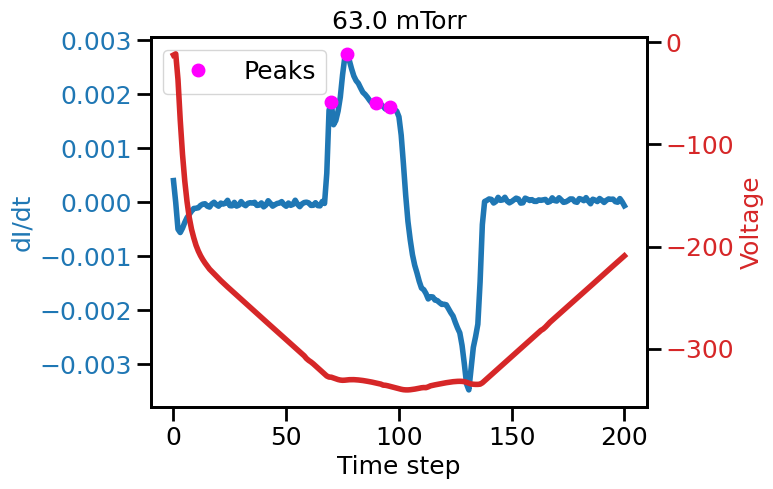

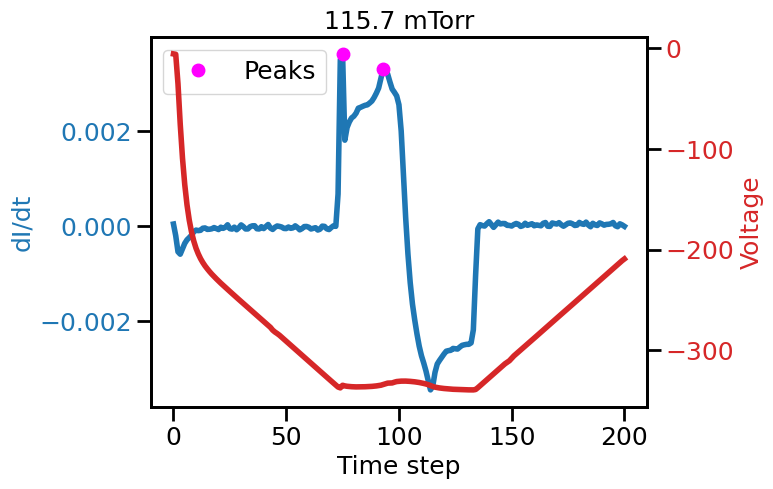

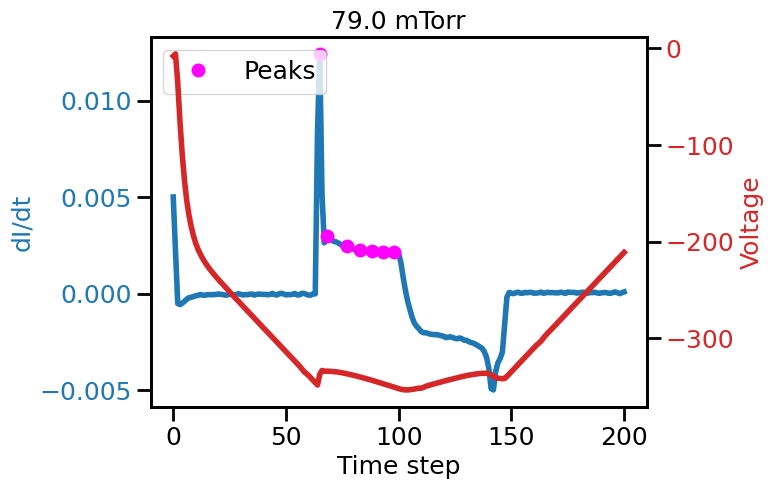

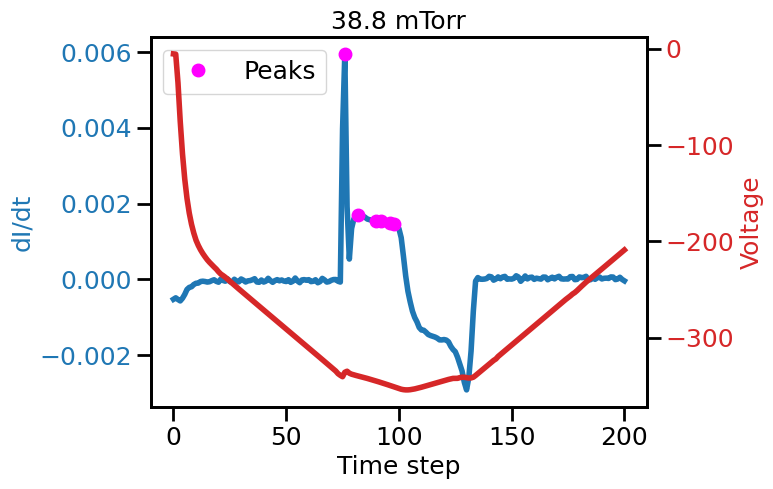

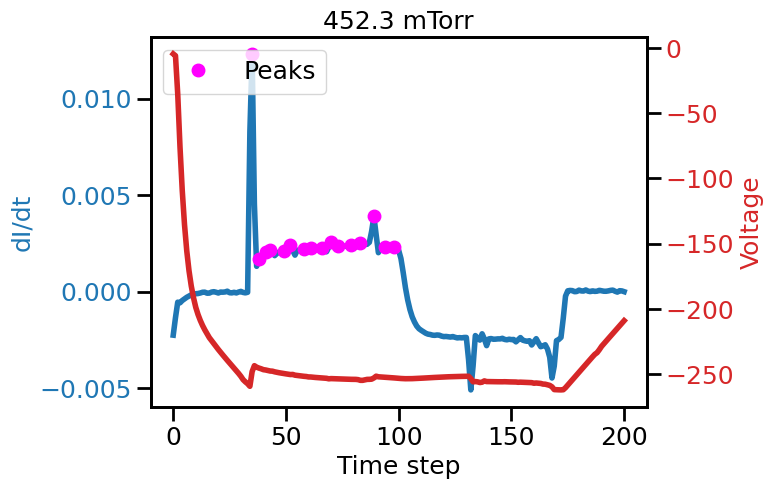

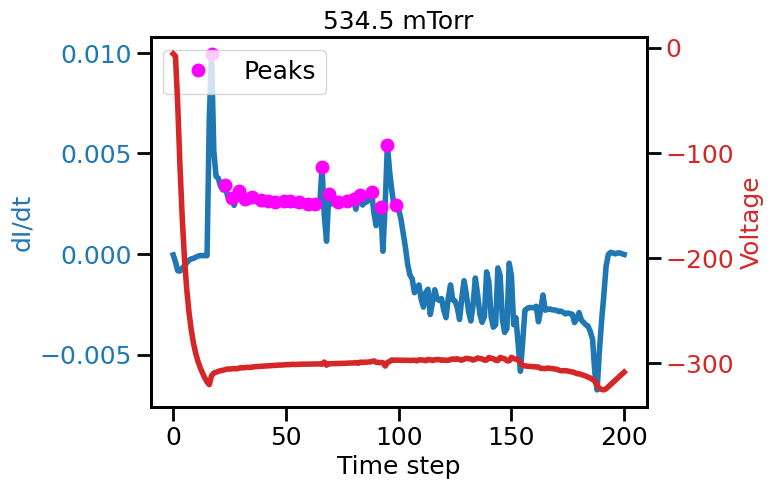

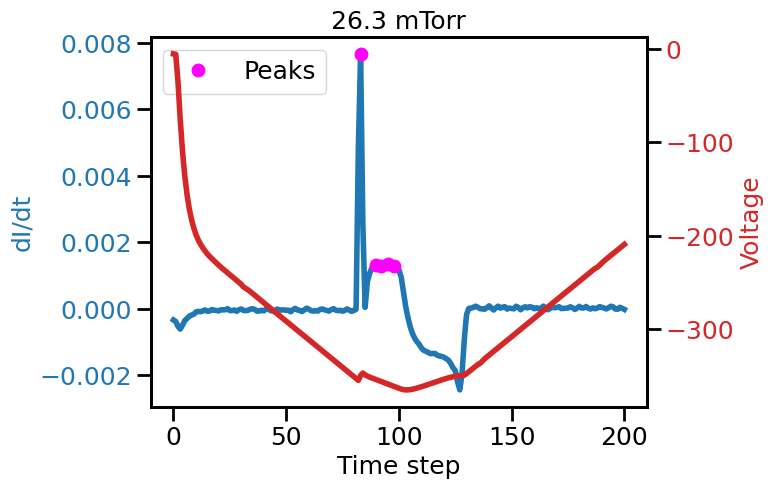

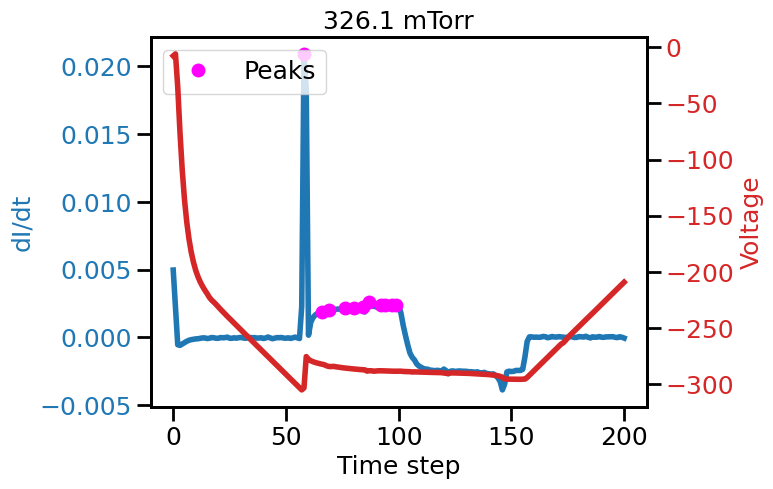

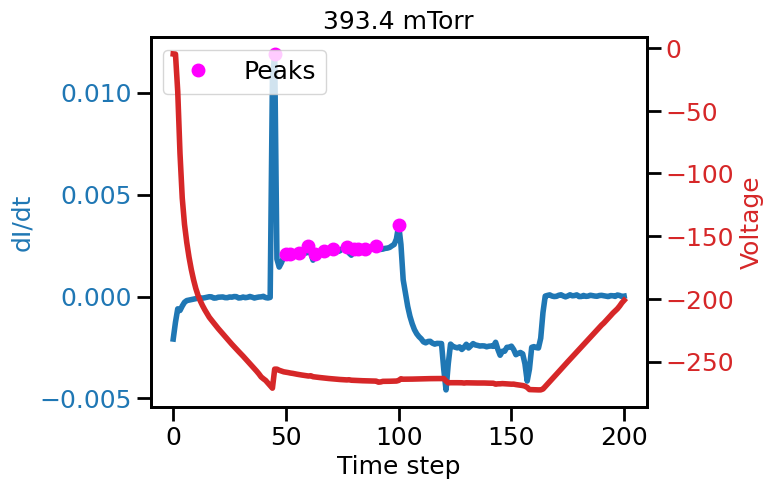

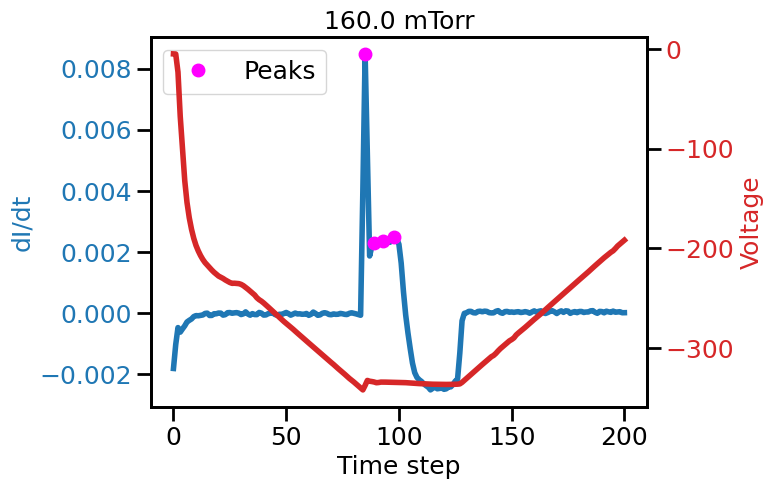

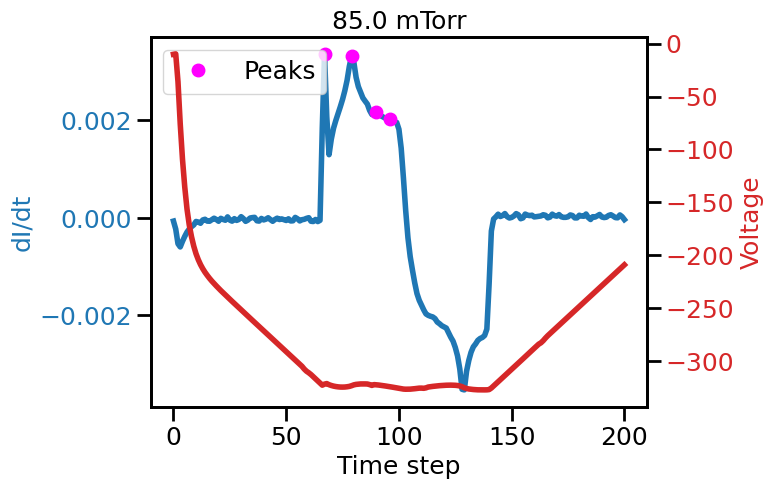

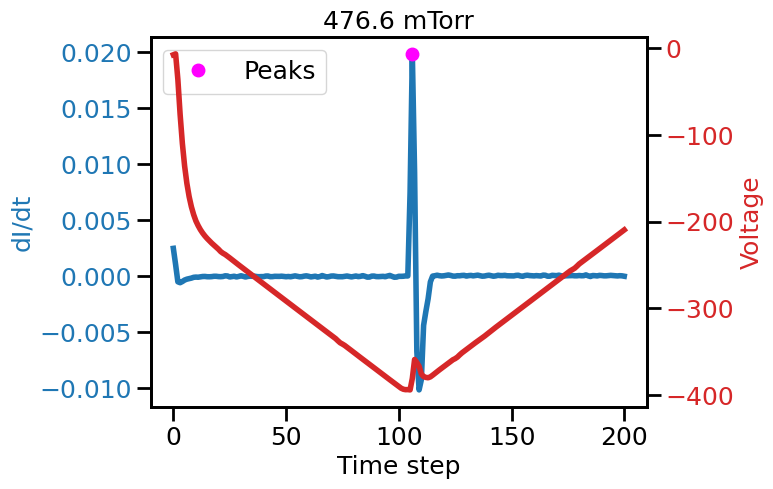

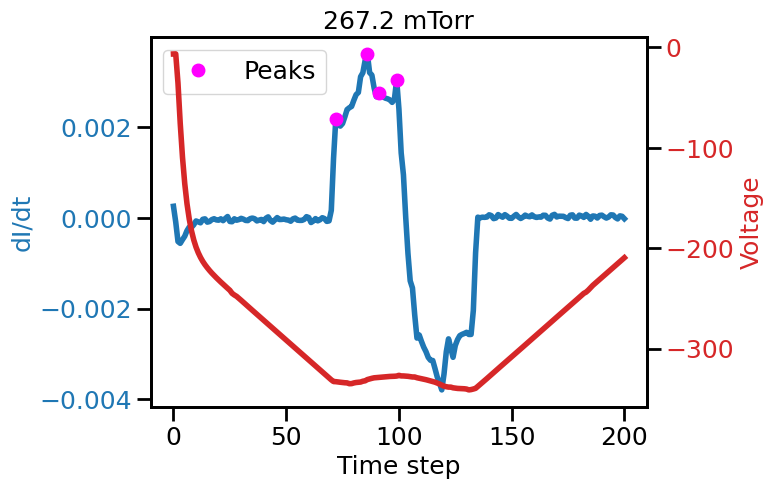

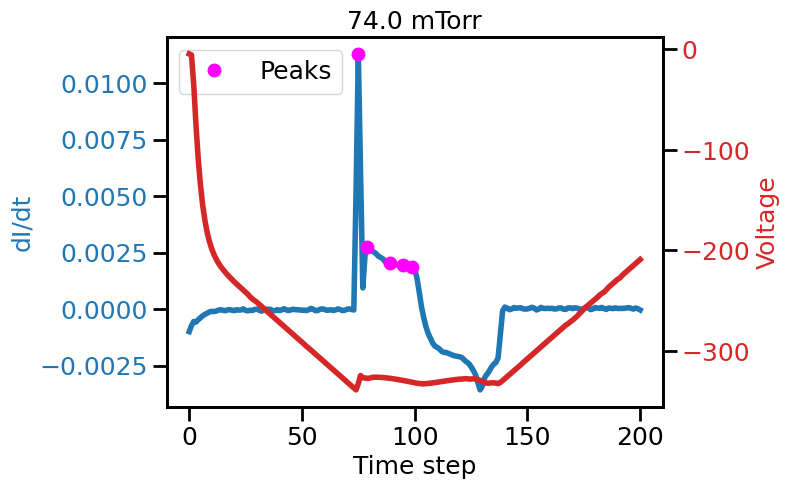

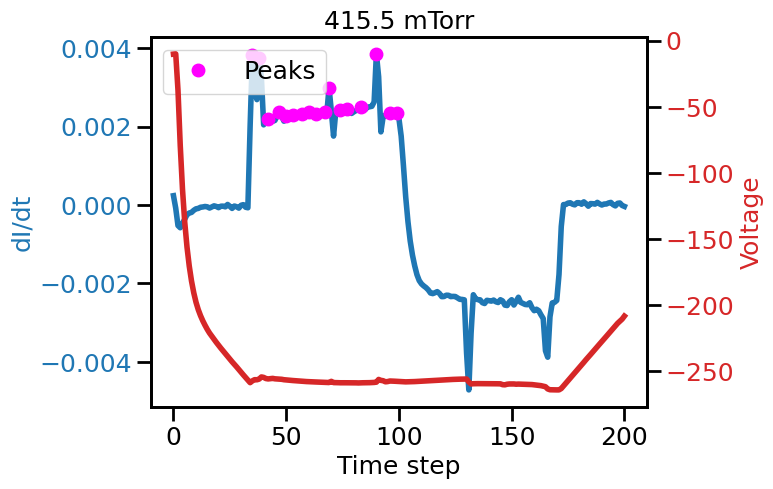

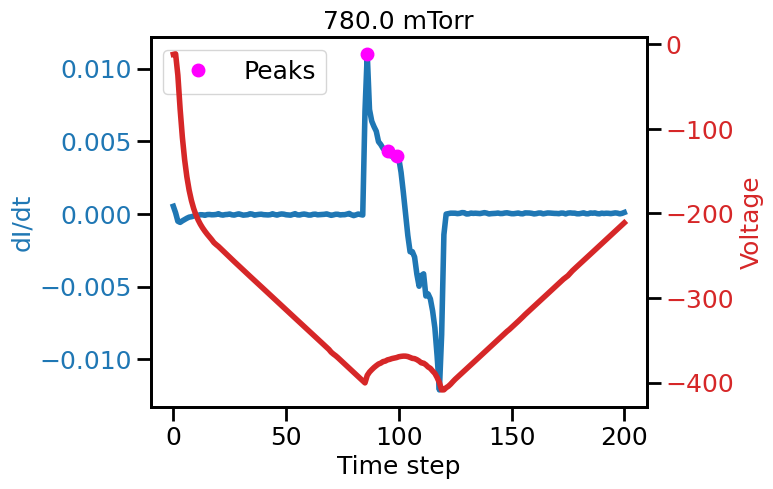

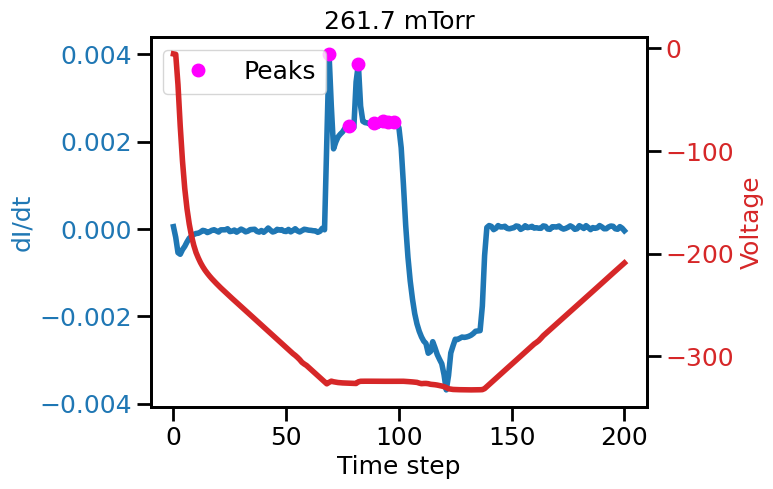

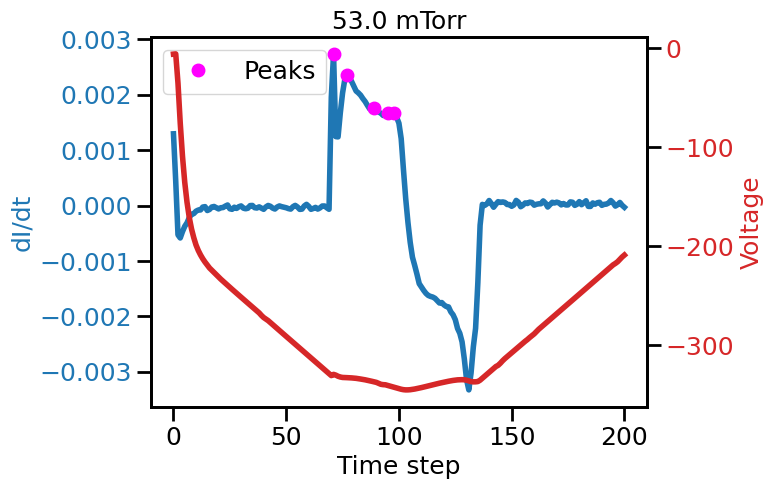

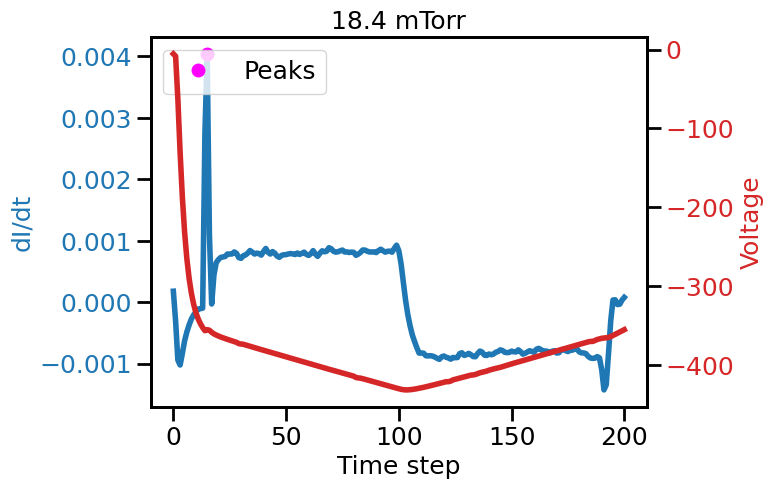

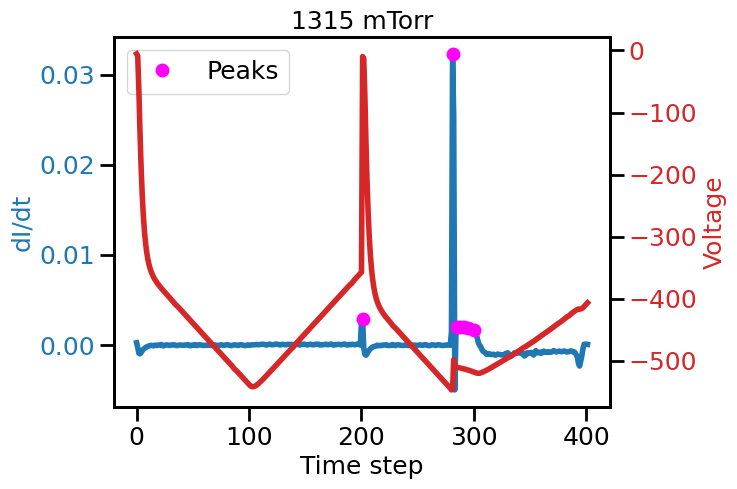

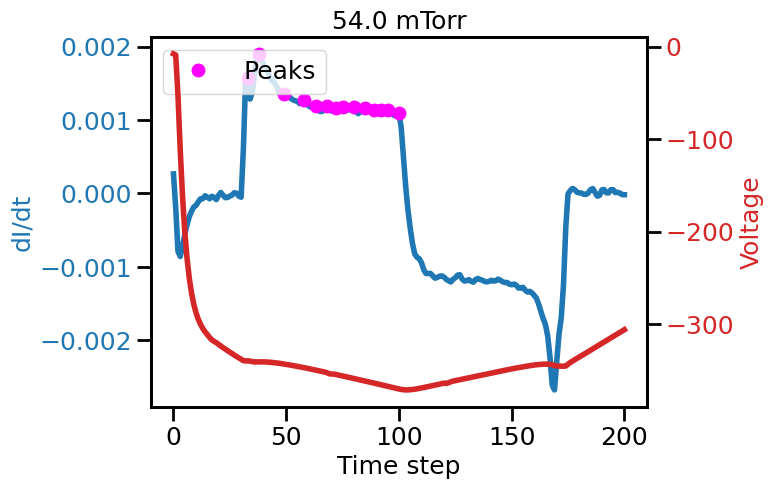

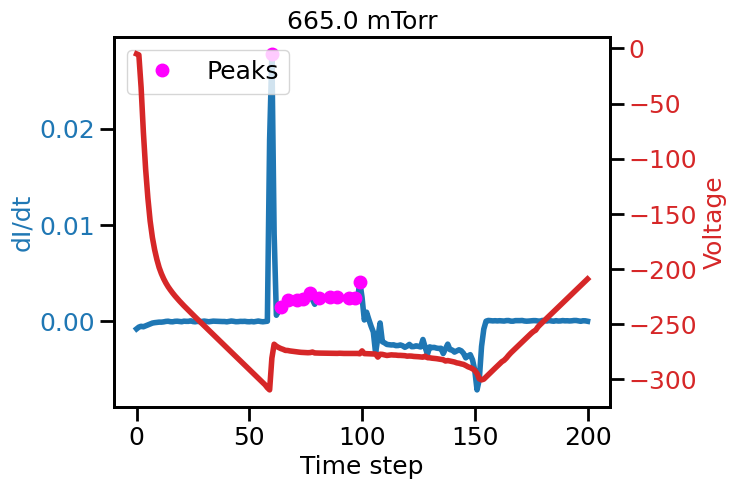

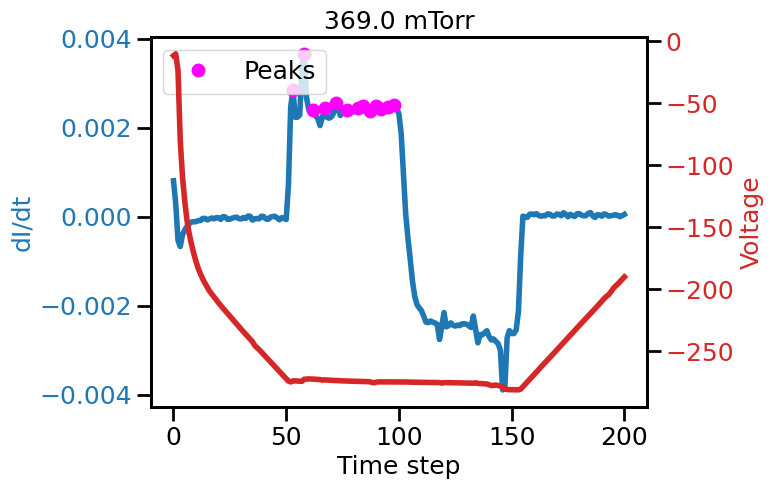

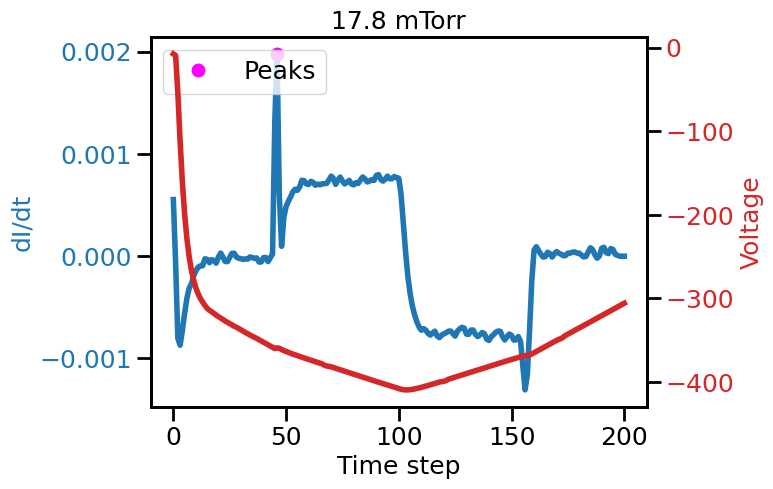

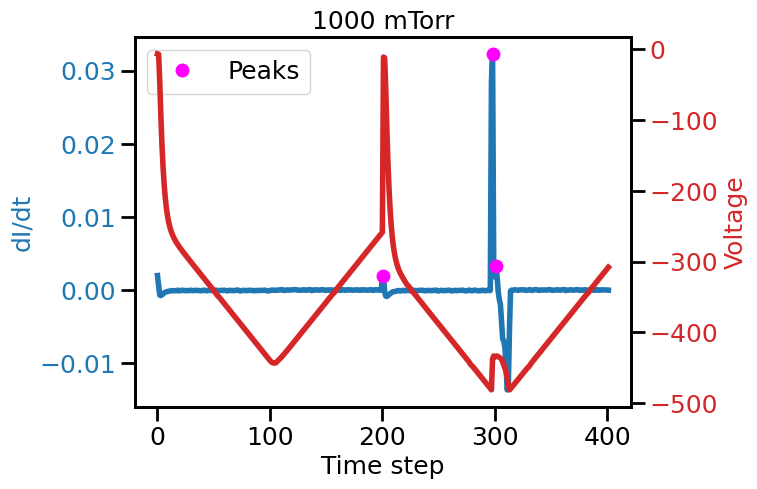

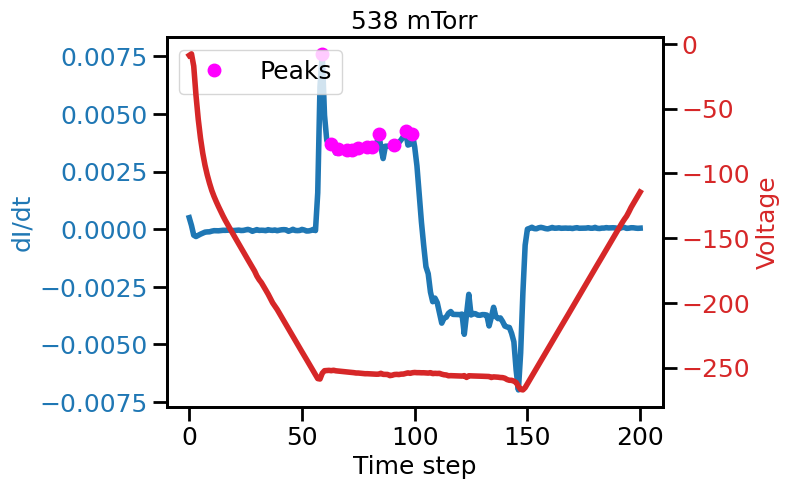

In [109]:
for key, df in dataframes_neg.items():

    get_breakdown_voltage(df, key.replace("mtorr_neg.txt", " mTorr"))

In [34]:
def get_breakdown_voltage(df, threshold = 0.01):

  # Compute derivative of Current with respect to Voltage
  derivatives = np.gradient(df["Current"], df["Voltage"])

  # Find indices where the derivative exceeds the threshold
  jump_indices = np.where(derivatives > threshold)[0]  # Returns indices where condition is met

  if jump_indices.size > 0:
      first_jump_index = jump_indices[0]  # Get first occurrence
      breakdown_voltage = df["Voltage"].iloc[first_jump_index]
      return breakdown_voltage
  else:
      return 0



In [110]:
breakdown_voltages_neg = []
pressures_neg = []

for key, item in dataframes_neg.items():
  #item.plot(x='Voltage', y='Current', kind='scatter')
  # Remove "mtorr_neg.txt" and convert the remaining number to float
  pressure = float(key.replace("mtorr_neg.txt", ""))*1e-3
  breakdown_voltage = get_breakdown_voltage(item, title=None, plotting=False)

  pressures_neg.append(pressure)
  breakdown_voltages_neg.append(-breakdown_voltage)


pressures_neg = np.array(pressures_neg)
breakdown_voltages_neg = np.array(breakdown_voltages_neg)

In [111]:
breakdown_voltages_neg

array([327.949386, 334.99936 , 337.28516 , 335.974763, 248.138757,
       311.532756, 349.207131, 303.428063, 256.023057, 337.795014,
       321.855846, 380.839188, 332.90465 , 332.130954, 257.21049 ,
       391.459175, 325.522959, 329.495504, 355.227908,   9.786167,
       339.401966, 280.902893, 273.945126, 359.282576,  11.085606,
       254.41837 ])

In [36]:
breakdown_voltages_pos = []
pressures_pos = []

for key, item in dataframes_pos.items():
    #item.plot(x='Voltage', y='Current', kind='scatter')
    # Remove "mtorr_neg.txt" and convert the remaining number to float
    pressure = float(key.replace("mtorr_pos.txt", ""))*1e-3
    breakdown_voltage = get_breakdown_voltage(item)

    pressures_pos.append(pressure)
    breakdown_voltages_pos.append(-breakdown_voltage)


pressures_pos = np.array(pressures_pos)
breakdown_voltages_pos = np.array(breakdown_voltages_pos)

In [38]:
pressures_pos

array([0.2618, 0.4523, 0.5343, 0.063 , 0.074 , 0.4766, 0.085 , 0.3934,
       0.3261, 0.054 , 1.315 , 0.1605, 0.267 , 0.78  , 0.4155, 0.538 ,
       1.    , 0.0803, 0.0178, 0.369 , 0.1143, 0.665 ])

In [39]:


def paschen_func(pd, A, B, gamma):
    # pd is the product pressure * distance
    return (B * pd) / (np.log(A * pd) - np.log(np.log(1 + 1/gamma)))


Fitted parameters:
A = 542.6311785671567
B = 2552.9844594774036
gamma = 0.00017372966140705008


/var/folders/2q/r_plhm951s93s5nlm_f8ymjr0000gn/T/ipykernel_86754/2371272628.py:3: RuntimeWarning: invalid value encountered in log
  return (B * pd) / (np.log(A * pd) - np.log(np.log(1 + 1/gamma)))


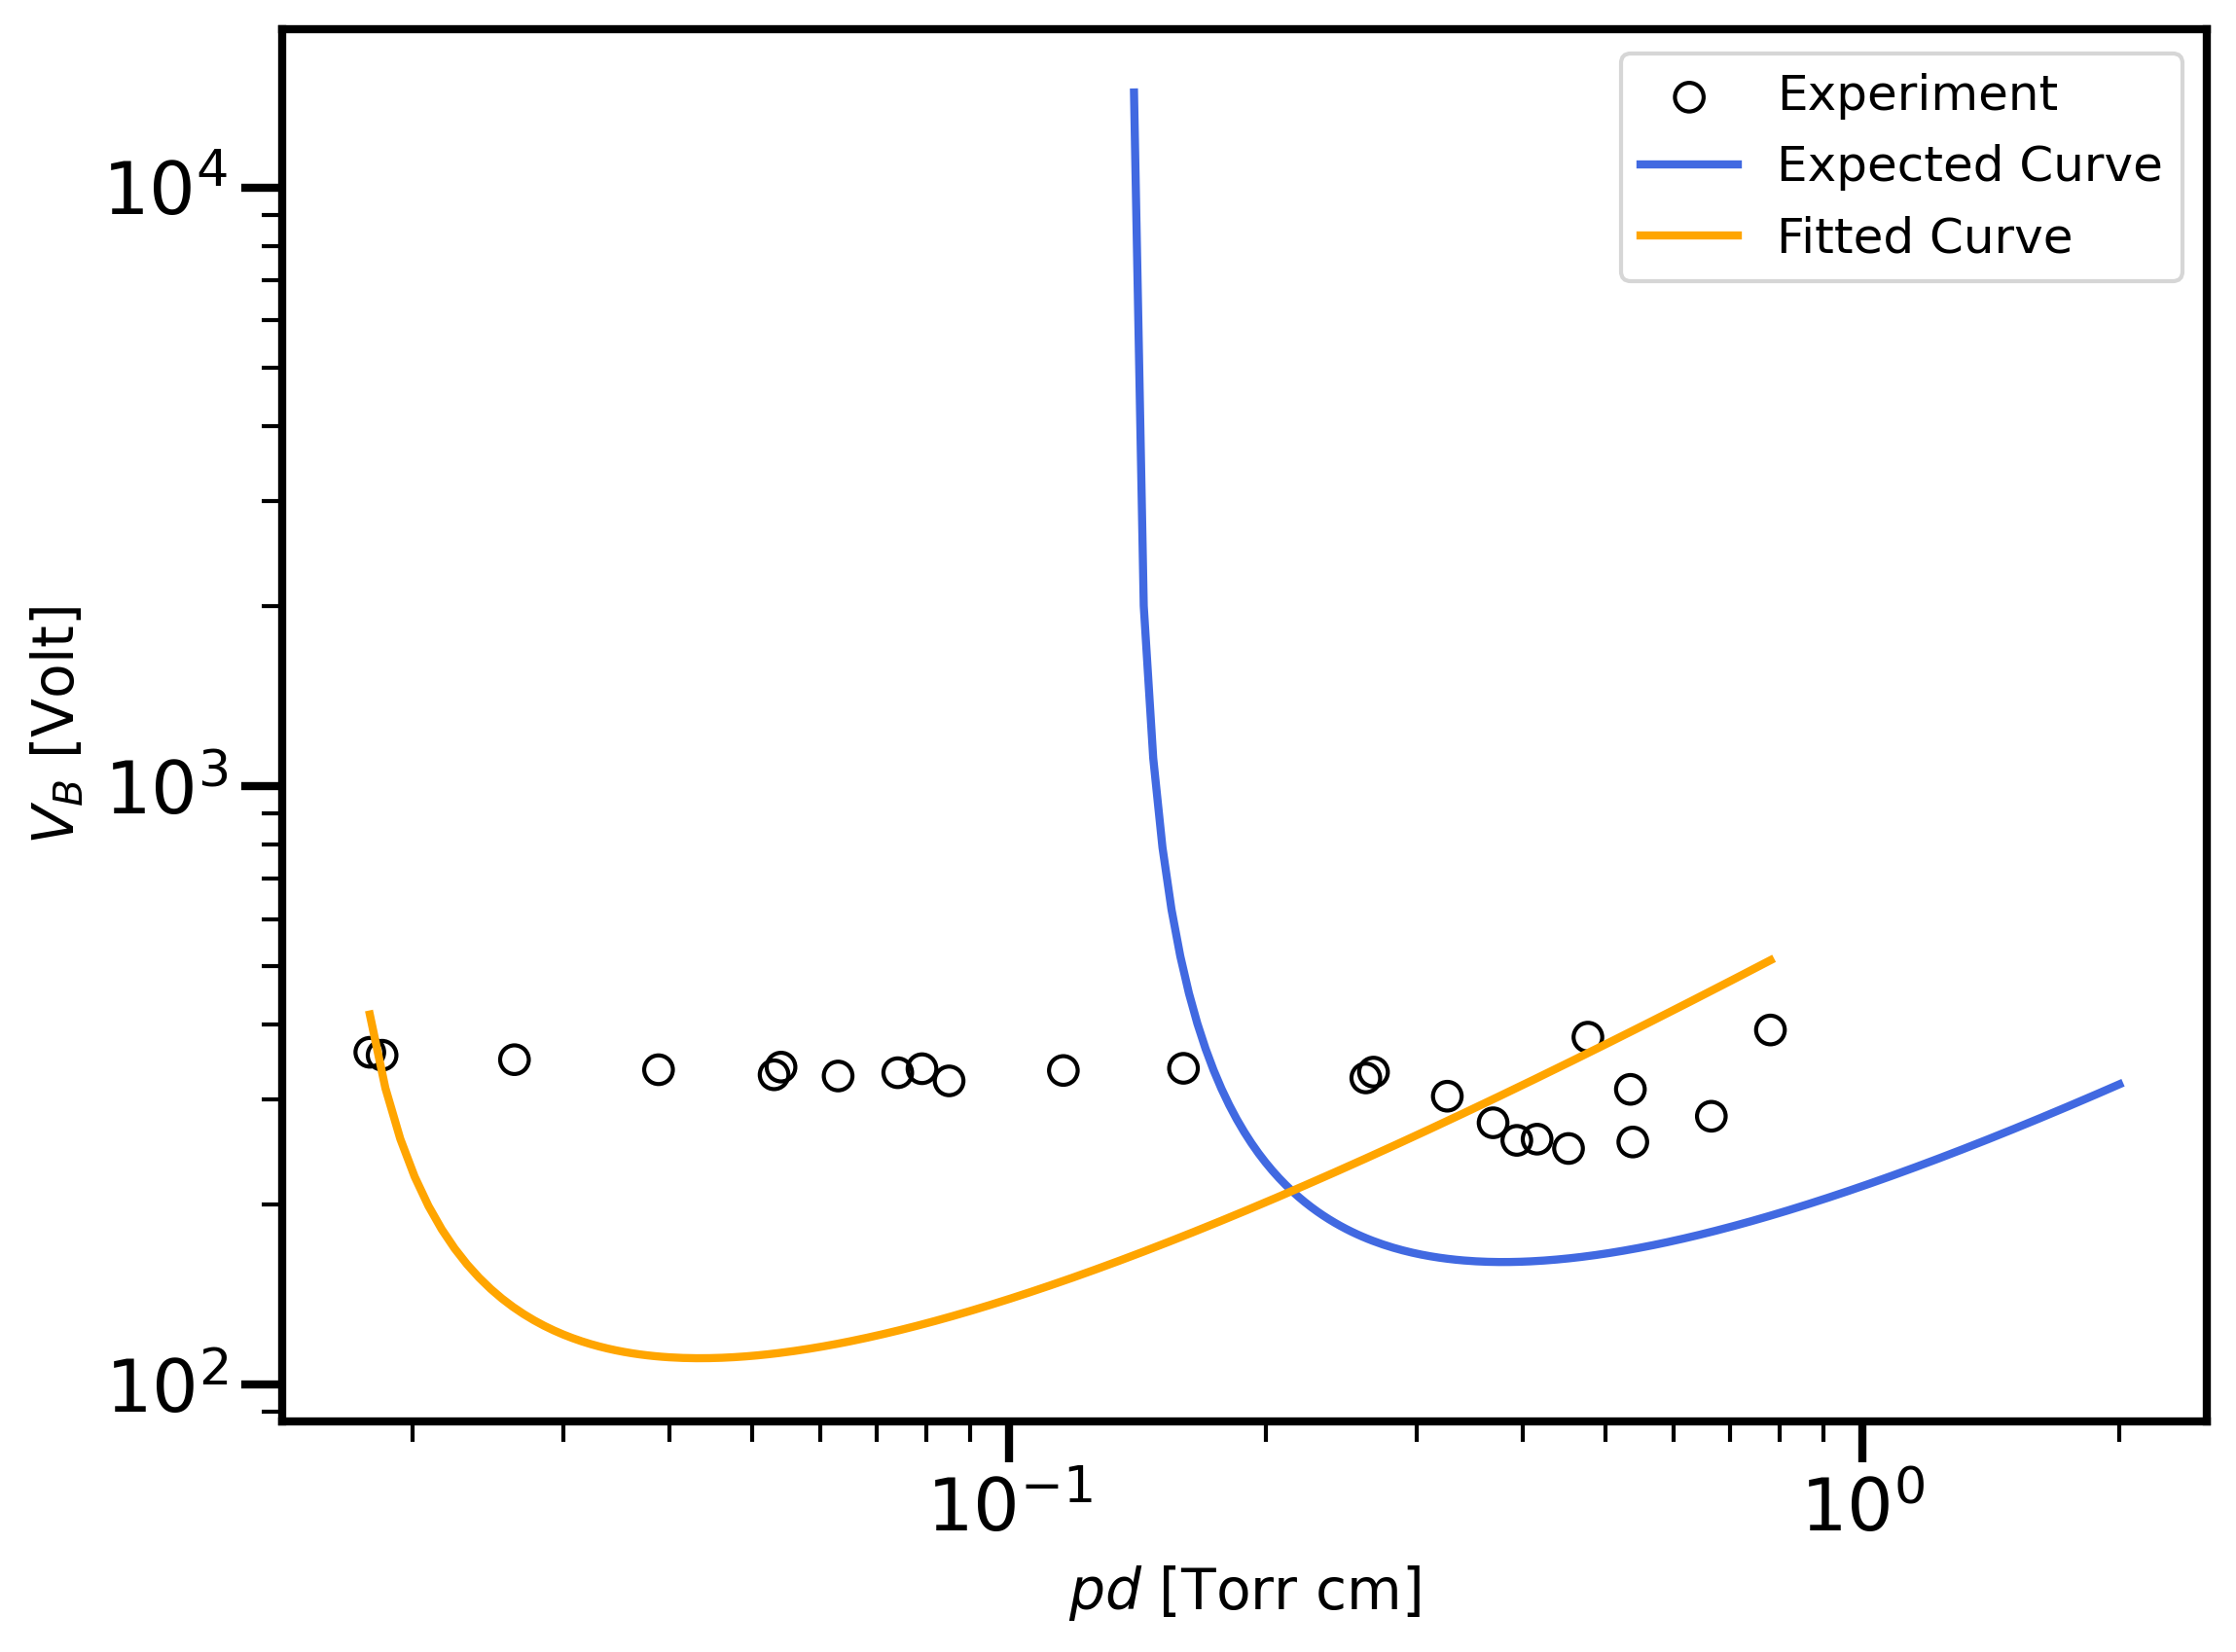

In [112]:
voltage_mask = breakdown_voltages_neg > 100
pressure_mask = pressures_neg > 0.0


xdata = pressures_neg[voltage_mask] * d
ydata = breakdown_voltages_neg[voltage_mask]

# we want to fit the experimental data, but only the data for large enough p

x_fit = pressures_neg[voltage_mask & pressure_mask] * d
y_fit = breakdown_voltages_neg[voltage_mask & pressure_mask]

# Initial guesses for the parameters [A, B, gamma]:
initial_guesses = [1e3, 1e2, 0.01]

# Fit the model to the filtered data:
params, covariance = curve_fit(paschen_func, xdata, ydata, p0=initial_guesses)
A_fit, B_fit, gamma_fit = params

print("Fitted parameters:")
print("A =", A_fit)
print("B =", B_fit)
print("gamma =", gamma_fit)

# Generate data for the fitted curve for plotting:
x_pred = np.linspace(np.min(x_fit), np.max(x_fit), 1000)
# Change: Use x_pred instead of x_fit to generate y_pred
y_pred = paschen_func(x_pred, *params)





# Create a high-resolution figure suitable for publication
plt.figure(figsize=(8, 6), dpi=300)

# Plot experimental data using unfilled circle markers with black edges
plt.scatter(xdata,
            ydata,
            label='Experiment',
            marker='o', facecolors='none', edgecolors='black', s=50)

# Label the axes with LaTeX formatting and increased font size
plt.xlabel(r"$pd$ [Torr cm]", fontsize=14)
plt.ylabel(r"$V_B$ [Volt]", fontsize=14)

# Plot the expected curve with a solid blue line
plt.plot(ps * d, Vs, color="royalblue", linewidth=2, linestyle="-", label="Expected Curve")

plt.plot(x_pred, y_pred, color="orange", linewidth=2, linestyle="-", label="Fitted Curve")

# Set both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Place the legend in the best location with a readable font size
plt.legend(loc='best', fontsize=12)

# Adjust layout to ensure no overlap of labels and elements
plt.tight_layout()

# Save the figure as a vector PDF for high-quality reproduction
# plt.savefig("paschen_curve.pdf", format="pdf")

plt.show()


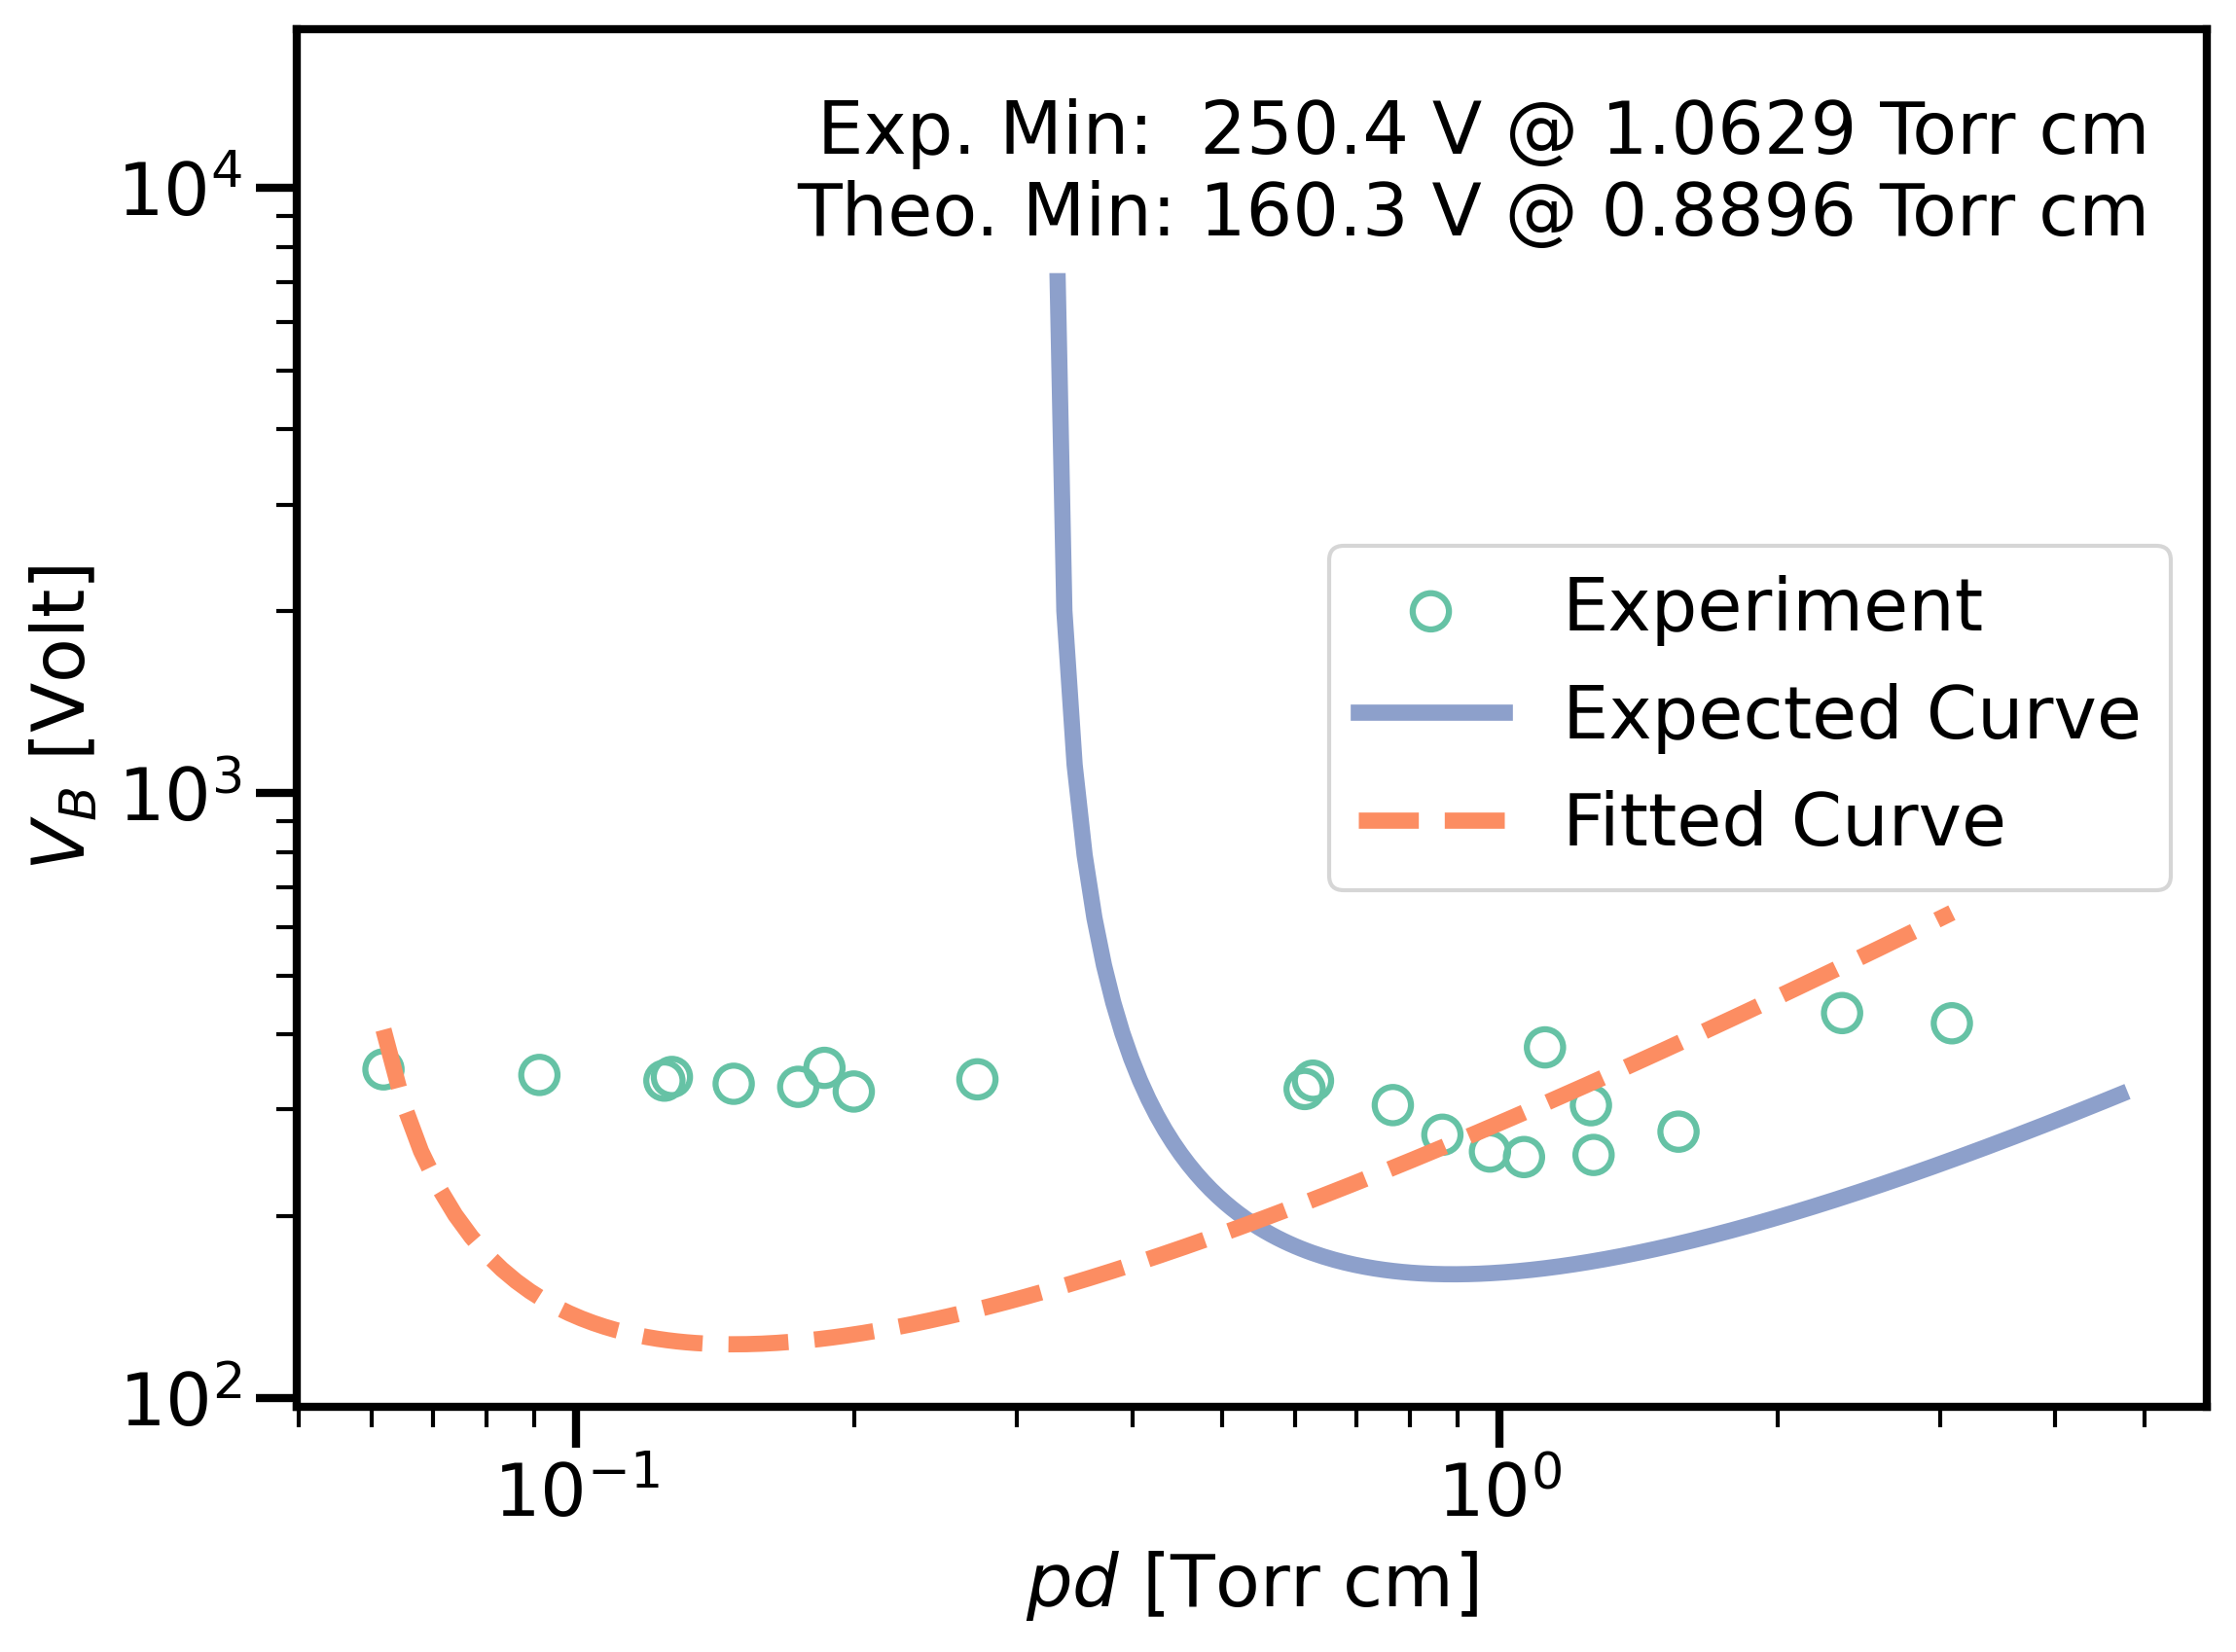

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# -------------------------------------------------
# Find minima
# -------------------------------------------------
idx_exp_min = np.argmin(ydata)
x_exp_min = xdata[idx_exp_min]
y_exp_min = ydata[idx_exp_min]

idx_theo_min = np.argmin(Vs)
x_theo_min = (ps * d)[idx_theo_min]
y_theo_min = Vs[idx_theo_min]

# -------------------------------------------------
# Matplotlib settings for thicker lines & bigger fonts
# -------------------------------------------------
plt.rcParams.update({
    'font.size': 18,          # Default text size
    'axes.labelsize': 18,     # Axis label size
    'axes.titlesize': 18,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'lines.linewidth': 4,     # Thicker lines by default
    'lines.markersize': 9,
    'axes.linewidth': 2,
    'xtick.major.size': 10,
    'xtick.major.width': 2,
    'ytick.major.size': 10,
    'ytick.major.width': 2,
    'xtick.minor.size': 5,
    'xtick.minor.width': 1,
    'ytick.minor.size': 5,
    'ytick.minor.width': 1
})

# -------------------------------------------------
# Plot
# -------------------------------------------------
plt.figure(figsize=(8, 6), dpi=300)

# 1) Experimental data (change color from black to something else, e.g. 'forestgreen')
plt.scatter(
    xdata, ydata,
    label='Experiment',
    marker='o',
    facecolors='none',
    edgecolors='#66c2a5',  # A green hue
    s=80,
    linewidth=1.5
)

# 2) Theoretical curve (royalblue)
plt.plot(ps * d, Vs, color="#8da0cb", linestyle="-", label="Expected Curve")

# 3) Fitted curve (change from orange to something else, e.g. 'tomato')
plt.plot(x_pred, y_pred, color="#fc8d62", linestyle="--", label="Fitted Curve")

# Axes labels
plt.xlabel(r"$pd$ [Torr cm]")
plt.ylabel(r"$V_B$ [Volt]")

# Log scales
plt.xscale('log')
plt.yscale('log')

# -------------------------------------------------
# Single text box showing both minima (no arrows)
# -------------------------------------------------
min_info = (
    f"Exp. Min:  {y_exp_min:.1f} V @ {x_exp_min:.4f} Torr cm\n"
    f"Theo. Min: {y_theo_min:.1f} V @ {x_theo_min:.4f} Torr cm"
)

plt.text(
    0.97, 0.95, min_info,            # (x, y) in axes-fraction coordinates
    transform=plt.gca().transAxes,
    fontsize=18,
    color='black',                   # Black text
    va='top',                        # Align text by its top
    ha='right',                      # Align text to the right
    bbox=dict(
        boxstyle="round,pad=0.3",
        fc="white",                  # White background
        ec="none",                   # No edge color
        lw=0                         # No border line width
    )
)

# plt.text(
#     0.02, 200,  # Adjust these coordinates as needed
#     r"$V_\text{breakdown} = \frac{B\,p\,d}{\ln(A\,p\,d)\;-\;\ln(\ln(1 + \frac{1}{\gamma}))}$",
#     color='royalblue',
#     fontsize=14
# )

# Legend, layout, etc.
plt.legend(loc='best')
plt.tight_layout()

# Save if desired
plt.savefig("paschen_curve.pdf", format="pdf")

plt.show()

In [49]:

def paschen_func(pd, A, B, gamma):
    # pd is the product pressure * distance
    return (B * pd) / (np.log(A * pd) - np.log(np.log(1 + 1/gamma)))



/var/folders/2q/r_plhm951s93s5nlm_f8ymjr0000gn/T/ipykernel_86754/2371272628.py:3: RuntimeWarning: invalid value encountered in log
  return (B * pd) / (np.log(A * pd) - np.log(np.log(1 + 1/gamma)))


Fitted parameters:
A = 542.6311785671567
B = 2552.9844594774036
gamma = 0.00017372966140705008


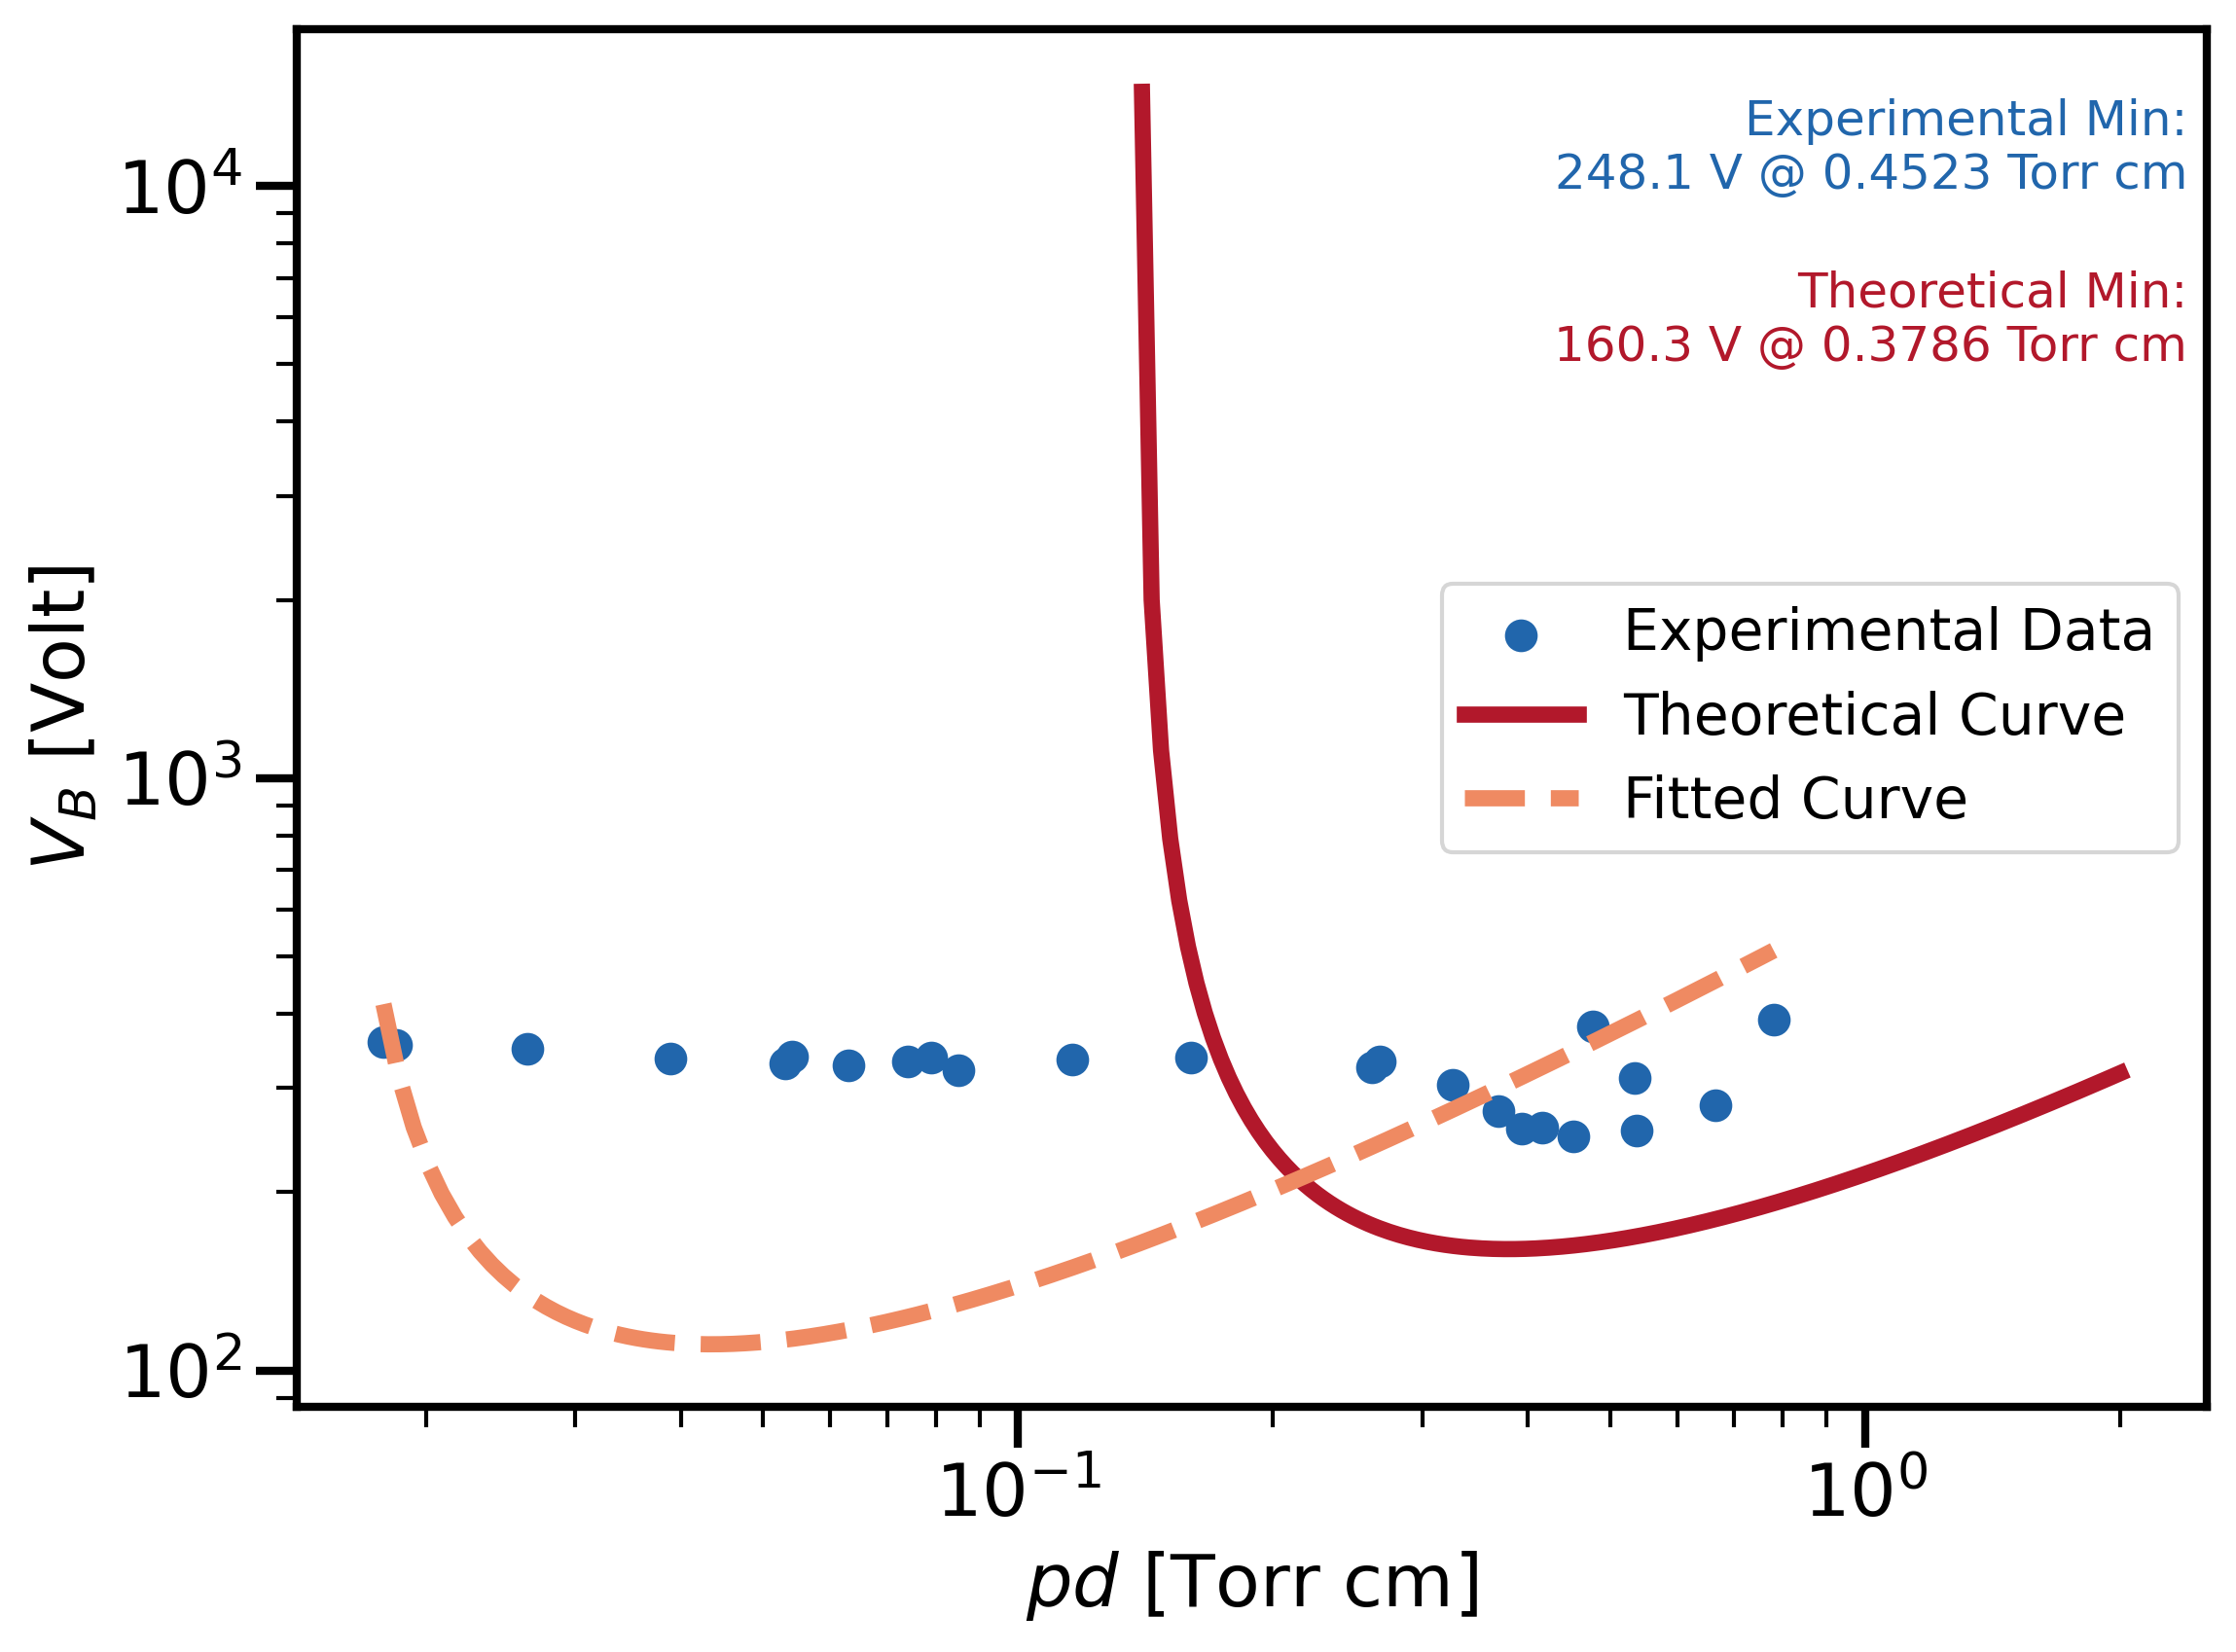

In [115]:
import numpy as np
import matplotlib.pyplot as plt

voltage_mask = breakdown_voltages_neg > 100
pressure_mask = pressures_neg > 0.0


xdata = pressures_neg[voltage_mask] * d
ydata = breakdown_voltages_neg[voltage_mask]

# we want to fit the experimental data, but only the data for large enough p

x_fit = pressures_neg[voltage_mask & pressure_mask] * d
y_fit = breakdown_voltages_neg[voltage_mask & pressure_mask]

# Initial guesses for the parameters [A, B, gamma]:
initial_guesses = [1e3, 1e2, 0.01]

# Fit the model to the filtered data:
params, covariance = curve_fit(paschen_func, xdata, ydata, p0=initial_guesses)
A_fit, B_fit, gamma_fit = params

print("Fitted parameters:")
print("A =", A_fit)
print("B =", B_fit)
print("gamma =", gamma_fit)

# Generate data for the fitted curve for plotting:
x_pred = np.linspace(np.min(x_fit), np.max(x_fit), 1000)
# Change: Use x_pred instead of x_fit to generate y_pred
y_pred = paschen_func(x_pred, *params)


# Define positions for text
text_y = 0.95
dy = 0.05*2.5

# -------------------------------------------------
# Find minima (example)
# -------------------------------------------------
idx_exp_min = np.argmin(ydata)
x_exp_min = xdata[idx_exp_min]
y_exp_min = ydata[idx_exp_min]

idx_theo_min = np.argmin(Vs)
x_theo_min = (ps * d)[idx_theo_min]
y_theo_min = Vs[idx_theo_min]


# -------------------------------------------------
# Matplotlib settings
# -------------------------------------------------
plt.rcParams.update({
    'font.size': 18,          # Default text size
    'axes.labelsize': 18,     # Axis label size
    'axes.titlesize': 18,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'lines.linewidth': 4,     # Thicker lines by default
    'lines.markersize': 9,
    'axes.linewidth': 2,
    'xtick.major.size': 10,
    'xtick.major.width': 2,
    'ytick.major.size': 10,
    'ytick.major.width': 2,
    'xtick.minor.size': 5,
    'xtick.minor.width': 1,
    'ytick.minor.size': 5,
    'ytick.minor.width': 1
})

# -------------------------------------------------
# Create figure
# -------------------------------------------------
plt.figure(figsize=(8, 6), dpi=300)

# Define colors
blue_points = "#2166ac"   # A nice blue for points
dark_red =   "#b2182b"    # Darker red for theoretical curve
light_red =  "#ef8a62"    # Lighter red for fitted curve

# 1) Experimental data (blue points)
plt.scatter(
    xdata, ydata,
    label='Experimental Data',
    color=blue_points,
    marker='o',
    s=50
)

# 2) Theoretical curve (dark red, solid)
plt.plot(
    ps * d, Vs,
    color=dark_red,
    linestyle="-",
    label="Theoretical Curve"
)

# 3) Fitted curve (lighter red, dashed)
plt.plot(
    x_pred, y_pred,
    color=light_red,
    linestyle="--",
    label="Fitted Curve"
)

# Axes labels
plt.xlabel(r"$pd$ [Torr cm]")
plt.ylabel(r"$V_B$ [Volt]")

# Log scales
plt.xscale('log')
plt.yscale('log')

# -------------------------------------------------
# Text box showing minima
# -------------------------------------------------

# 1) Experimental Min (blue)
plt.text(
    0.99, text_y,
    f"Experimental Min:\n{y_exp_min:.1f} V @ {x_exp_min:.4f} Torr cm",
    transform=plt.gca().transAxes,
    fontsize=12,
    color=blue_points,
    va='top',
    ha='right'
)

# 2) Theoretical Min (red), placed slightly lower
plt.text(
    0.99, text_y - dy,
    f"Theoretical Min:\n{y_theo_min:.1f} V @ {x_theo_min:.4f} Torr cm",
    transform=plt.gca().transAxes,
    fontsize=12,
    color=dark_red,
    va='top',
    ha='right'
)

# min_info = (
#     f"Experimental Min:  {y_exp_min:.1f} V @ {x_exp_min:.4f} Torr cm\n"
#     f"Theoretical Min: {y_theo_min:.1f} V @ {x_theo_min:.4f} Torr cm"
# )
# plt.text(
#     0.97, 0.95, min_info,
#     transform=plt.gca().transAxes,
#     fontsize=14,
#     va='top',
#     ha='right',
#     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8)
# )

# -------------------------------------------------
# Text box reporting parameters
# -------------------------------------------------
# param_text = (
#     rf"$A = {A_fit:.2e}$" + "\n" +
#     rf"$B = {B_fit:.2e}$" + "\n" +
#     rf"$\gamma = {gamma_fit:.2e}$"
# )
# plt.text(
#     0.03, 0.03, param_text,
#     transform=plt.gca().transAxes,
#     fontsize=14,
#     va='bottom',
#     ha='left',
#     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8)
# )

# Legend
plt.legend(loc='center right', fontsize=14)
# plt.title('Negative Sweep', fontsize=20)

plt.tight_layout()

plt.savefig("../Figures/paschen_curve.png", format="png", dpi=300)
plt.show()
